<a href="https://colab.research.google.com/github/Girnuj/DataScienceTP/blob/main/Copia_de_Trabajo_Final_Samuel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importaciones y cargado del DS**

In [ ]:
# Importaciones de bibliotecas de manejo de datos
import pandas as pd
import numpy as np

# Importaciones de bibliotecas de visualización
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
import pydotplus
from IPython.display import Image

# Importaciones de bibliotecas de estadísticas y pruebas
from scipy.stats import chi2_contingency, norm, mode

# Importaciones de bibliotecas de aprendizaje automático
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, LabelEncoder, Normalizer, MaxAbsScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold, cross_val_predict, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.inspection import permutation_importance
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
%matplotlib inline

Con este codigo se carga automaticamente el dataset, no hace falta crear una ruta a nuestro drive

In [ ]:
#Importamos dataset
from google.colab import drive
import gdown

#Google Drive file id
file_id = '1nSCjkpRcuZwzt08_ZbwEqoYVL871gMQ3'

#create download url
url = f'https://drive.google.com/uc?id={file_id}'

#download file
gdown.download(url, 'df_final.csv', quiet=False)

#read the csv file
df_final = pd.read_csv('df_final.csv', sep=",", encoding="latin1")

Downloading...
From: https://drive.google.com/uc?id=1nSCjkpRcuZwzt08_ZbwEqoYVL871gMQ3
To: /content/df_final.csv
100%|██████████| 3.04M/3.04M [00:00<00:00, 166MB/s]


In [ ]:
#Importamos dataset
from google.colab import drive
import gdown

#Google Drive file id
file_id = '1Ur-FlQWib0-Ggz3or7MPMJFfPEDA6aRp'

#create download url
url = f'https://drive.google.com/uc?id={file_id}'

#download file
gdown.download(url, 'df_prueba.csv', quiet=False)

#read the csv file
df_prueba = pd.read_csv('df_prueba.csv', sep=",", encoding="latin1")

Downloading...
From: https://drive.google.com/uc?id=1Ur-FlQWib0-Ggz3or7MPMJFfPEDA6aRp
To: /content/df_prueba.csv
100%|██████████| 12.2M/12.2M [00:00<00:00, 133MB/s]


In [ ]:
# df_final = pd.concat([df_firts, df_prueba], axis=0)
# df_final.head(10)

# Limpieza de Datos Y Preparación del Dataset

In [ ]:
# Definimos el diccionario de traducciones a Español.
traducciones = {
    'Unnamed: 0': 'Nro de Registro',
    'id': 'id',
    'Gender': 'Genero',
    'Customer Type': 'Tipo_de_Cliente',
    'Age': 'Edad',
    'Type of Travel': 'Tipo_de_Viaje',
    'Class': 'Clase',
    'Flight Distance': 'Distancia_del_Vuelo',
    "Inflight wifi service": 'Servicio_de_Wifi_a_Bordo',
    "Departure/Arrival time convenient": 'Conveniencia_de_Hora_de_Salida_Llegada',
    "Ease of Online booking": 'Facilidad_de_Reserva_en_Linea',
    "Gate location": 'Ubicacion_de_la_Puerta',
    'Food and drink': 'Comida_y_Bebida',
    'Online boarding': 'Embarque_en_Linea',
    'Seat comfort': 'Comodidad_del_Asiento',
    'Inflight entertainment': 'Entretenimiento_a_Bordo',
    'On-board service': 'Servicio_a_Bordo',
    'Leg room service': 'Servicio_de_Espacio_para_las_Piernas',
    'Baggage handling': 'Manejo_de_Equipaje',
    'Checkin service': 'Servicio_de_Check-in',
    'Inflight service': 'Servicio_a_Bordo_en_el_Avion',
    'Cleanliness': 'Limpieza',
    'Departure Delay in Minutes': 'Retraso_en_la_Salida_en_Minutos',
    'Arrival Delay in Minutes': 'Retraso_en_la_Llegada_en_Minutos',
    'satisfaction':'satisfaccion'
}

# Utilizamos el método rename() para cambiar las etiquetas en el DataFrame
df_final.rename(columns=traducciones, inplace=True)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Nro de Registro                         25976 non-null  int64  
 1   id                                      25976 non-null  int64  
 2   Genero                                  25976 non-null  object 
 3   Tipo_de_Cliente                         25976 non-null  object 
 4   Edad                                    25976 non-null  int64  
 5   Tipo_de_Viaje                           25976 non-null  object 
 6   Clase                                   25976 non-null  object 
 7   Distancia_del_Vuelo                     25976 non-null  int64  
 8   Servicio_de_Wifi_a_Bordo                25976 non-null  int64  
 9   Conveniencia_de_Hora_de_Salida_Llegada  25976 non-null  int64  
 10  Facilidad_de_Reserva_en_Linea           25976 non-null  in

In [ ]:
# sns.pairplot(df_final.sample(frac = 0.1), hue = 'satisfaccion');

<Axes: >

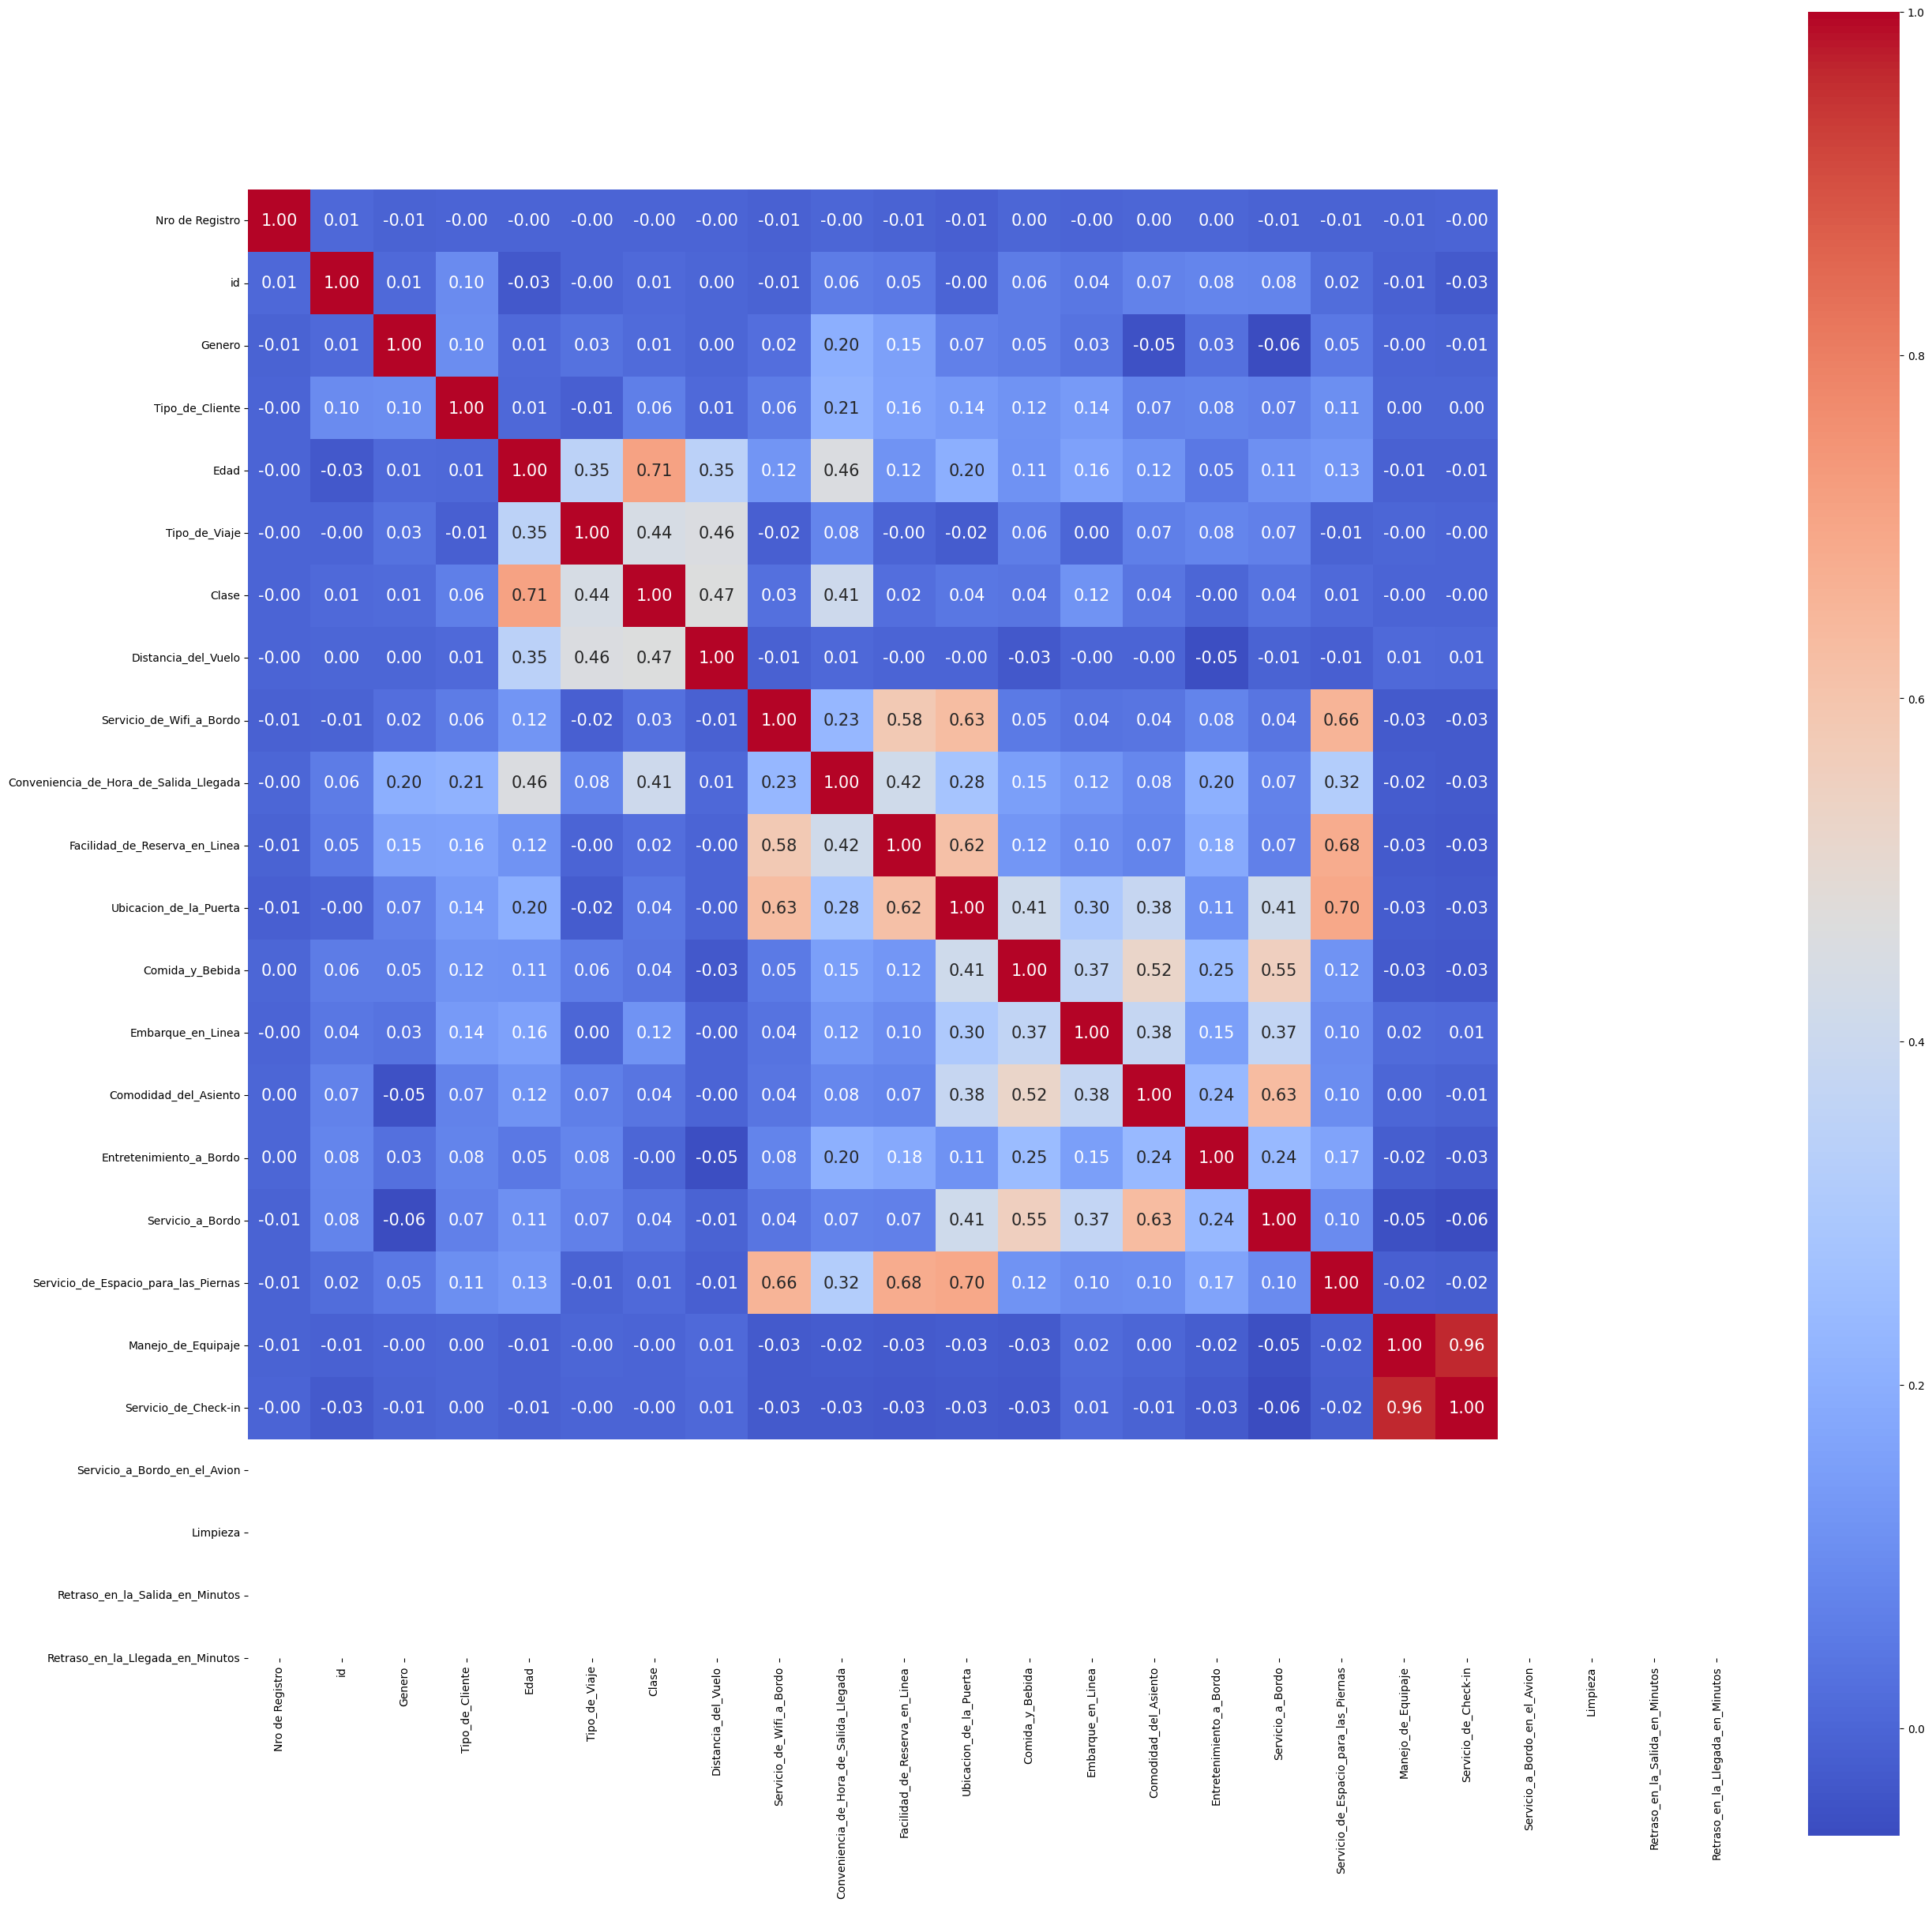

In [ ]:
corr = df_final.drop(columns = ['satisfaccion'], axis=1).corr(method='pearson', numeric_only=True) # .corr is used for find corelation
plt.figure(figsize=(30,30))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= df_final.drop(columns = ['satisfaccion']).columns,
           yticklabels= df_final.drop(columns = ['satisfaccion']).columns,
           cmap= 'coolwarm')

In [ ]:
df_final.head(10)

,Nro de Registro,id,Genero,Tipo_de_Cliente,Edad,Tipo_de_Viaje,Clase,Distancia_del_Vuelo,Servicio_de_Wifi_a_Bordo,Conveniencia_de_Hora_de_Salida_Llegada,...,Entretenimiento_a_Bordo,Servicio_a_Bordo,Servicio_de_Espacio_para_las_Piernas,Manejo_de_Equipaje,Servicio_de_Check-in,Servicio_a_Bordo_en_el_Avion,Limpieza,Retraso_en_la_Salida_en_Minutos,Retraso_en_la_Llegada_en_Minutos,satisfaccion
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
5,5,39177,Male,Loyal Customer,16,Business travel,Eco,311,3,3,...,5,4,3,1,1,2,5,0,0.0,satisfied
6,6,79433,Female,Loyal Customer,77,Business travel,Business,3987,5,5,...,5,5,5,5,4,5,3,0,0.0,satisfied
7,7,97286,Female,Loyal Customer,43,Business travel,Business,2556,2,2,...,4,4,4,4,5,4,3,77,65.0,satisfied
8,8,27508,Male,Loyal Customer,47,Business travel,Eco,556,5,2,...,5,2,2,5,3,3,5,1,0.0,satisfied
9,9,62482,Female,Loyal Customer,46,Business travel,Business,1744,2,2,...,4,4,4,4,5,4,4,28,14.0,satisfied


In [ ]:
#Vemos los porcentajes de las filas con datos no nulos
filas = df_final.shape[0]
porcentajes = []
colum =[]
for col in df_final.columns:
    porcent = df_final[col].count() / filas*100
    porcentajes.append(round(porcent,2))
    colum.append(col)

#creamos un dataFrame con los porcentajes por columnas
dic_porcent_no_nulos = {'Columna': colum, 'Porcentaje': porcentajes}
porcentajes_df = pd.DataFrame(dic_porcent_no_nulos)
porcentajes_df

,Columna,Porcentaje
0,Nro de Registro,100.00
1,id,100.00
2,Genero,100.00
3,Tipo_de_Cliente,100.00
4,Edad,100.00
5,Tipo_de_Viaje,100.00
6,Clase,100.00
7,Distancia_del_Vuelo,100.00
8,Servicio_de_Wifi_a_Bordo,100.00
9,Conveniencia_de_Hora_de_Salida_Llegada,100.00


In [ ]:
# Verificar los valores NaN en todo el DataFrame y obtener los índices de las filas que contienen NaN
nan_rows = df_final[df_final.isnull().any(axis=1)].index

# Imprimir los índices de las filas que contienen NaN
print(nan_rows)
print(len(nan_rows))

Int64Index([  516,   656,  1071,  1224,  1589,  1816,  1832,  2771,  2911,
             3194,  3197,  3428,  3488,  3516,  3557,  3713,  3906,  4023,
             4580,  5215,  5954,  6378,  6419,  6556,  7031,  7087,  8195,
             8217,  8550,  8985, 10151, 10244, 11151, 11687, 12296, 12699,
            12790, 12954, 13125, 13291, 13474, 13967, 14082, 14446, 14652,
            14788, 14898, 15628, 15716, 15719, 16430, 16594, 16939, 17295,
            17423, 17602, 17841, 17877, 18070, 18076, 18835, 18963, 19061,
            19588, 19672, 20032, 20143, 20382, 20409, 20468, 20490, 20738,
            21740, 21953, 22007, 23024, 23308, 23801, 24072, 24133, 24301,
            25128, 25468],
           dtype='int64')
83


In [ ]:
# Eliminar todas las filas que contengan valores NaN o nulos en alguna de sus columnas
df_final = df_final.dropna()

In [ ]:
# Verificar NUEVAMENTE los valores NaN en todo el DataFrame y obtener los índices de las filas que contienen NaN
nan_rows = df_final[df_final.isnull().any(axis=1)].index

# Imprimir los índices de las filas que contienen NaN
print(nan_rows)
print(len(nan_rows))

Int64Index([], dtype='int64')
0


In [ ]:
# Crear una nueva columna llamada "Satisfaccion_binaria" con valores 0 por defecto
df_final.loc[:,'Satisfaccion_binaria'] = 0

# Asignar 1 a los registros donde la columna "satisfaccion" es igual a "Satisfecho"
df_final.loc[df_final['satisfaccion'] == 'satisfied', 'Satisfaccion_binaria'] = 1

df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25893 entries, 0 to 25975
Data columns (total 26 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Nro de Registro                         25893 non-null  int64  
 1   id                                      25893 non-null  int64  
 2   Genero                                  25893 non-null  object 
 3   Tipo_de_Cliente                         25893 non-null  object 
 4   Edad                                    25893 non-null  int64  
 5   Tipo_de_Viaje                           25893 non-null  object 
 6   Clase                                   25893 non-null  object 
 7   Distancia_del_Vuelo                     25893 non-null  int64  
 8   Servicio_de_Wifi_a_Bordo                25893 non-null  int64  
 9   Conveniencia_de_Hora_de_Salida_Llegada  25893 non-null  int64  
 10  Facilidad_de_Reserva_en_Linea           25893 non-null  in

<ipython-input-13-4df519b953ba>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final.loc[:,'Satisfaccion_binaria'] = 0


In [ ]:
print("\033[1mGenero\033[0m")
print(df_final.Genero.value_counts() / df_final.shape[0], "\n")
print("\033[1mTipo de Cliente\033[0m")
print(df_final.Tipo_de_Cliente.value_counts() / df_final.shape[0], "\n")
print("\033[1mTipo de Viaje\033[0m")
print(df_final.Tipo_de_Viaje.value_counts() / df_final.shape[0], "\n")
print("\033[1mClase\033[0m")
print(df_final.Clase.value_counts() / df_final.shape[0], "\n")

Genero
Female    0.506971
Male      0.493029
Name: Genero, dtype: float64 

Tipo de Cliente
Loyal Customer       0.815317
disloyal Customer    0.184683
Name: Tipo_de_Cliente, dtype: float64 

Tipo de Viaje
Business travel    0.694396
Personal Travel    0.305604
Name: Tipo_de_Viaje, dtype: float64 

Clase
Business    0.481095
Eco         0.445062
Eco Plus    0.073842
Name: Clase, dtype: float64 



In [ ]:
# label_encoder = LabelEncoder()
# df_final.loc[:,'Genero_le'] = label_encoder.fit_transform(df_final['Genero'])
# df_final.loc[:,'Tipo_de_Cliente_le'] = label_encoder.fit_transform(df_final['Tipo_de_Cliente'])
# df_final.loc[:,'Tipo_de_Viaje_le'] = label_encoder.fit_transform(df_final['Tipo_de_Viaje'])
# df_final.loc[:,'Clase_le'] = label_encoder.fit_transform(df_final['Clase'])
# df_final.sample(10)

In [ ]:
# Definir las categorías de edades
bins = [0, 15, 30, 60, 90]
labels = ['niño', 'joven', 'adulto', 'adulto mayor']

# Crear una nueva columna 'Categoria_Edad' en el DataFrame
df_final['Categoria_Edad'] = pd.cut(df_final['Edad'], bins=bins, labels=labels, right=False)

In [ ]:
# Determinar el valor mínimo y máximo de 'Distancia_del_Vuelo'
min_distancia = df_final['Distancia_del_Vuelo'].min()-1
max_distancia = df_final['Distancia_del_Vuelo'].max()+1

# Crear bins para cuatro categorías
bins = [min_distancia, (max_distancia - min_distancia) / 4, (max_distancia - min_distancia) / 2, (max_distancia - min_distancia) * 3 / 4, max_distancia]
labels = ['corta distancia', 'media distancia', 'larga distancia', 'extra distancia']

print('bins:',bins)

# Crear una nueva columna 'Categoria_Distancia' en el DataFrame
df_final['Categoria_Distancia'] = pd.cut(df_final['Distancia_del_Vuelo'], bins=bins, labels=labels, right=False)

df_final.info()

bins: [30, 1238.5, 2477.0, 3715.5, 4984]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 25893 entries, 0 to 25975
Data columns (total 28 columns):
 #   Column                                  Non-Null Count  Dtype   
---  ------                                  --------------  -----   
 0   Nro de Registro                         25893 non-null  int64   
 1   id                                      25893 non-null  int64   
 2   Genero                                  25893 non-null  object  
 3   Tipo_de_Cliente                         25893 non-null  object  
 4   Edad                                    25893 non-null  int64   
 5   Tipo_de_Viaje                           25893 non-null  object  
 6   Clase                                   25893 non-null  object  
 7   Distancia_del_Vuelo                     25893 non-null  int64   
 8   Servicio_de_Wifi_a_Bordo                25893 non-null  int64   
 9   Conveniencia_de_Hora_de_Salida_Llegada  25893 non-null  int64   
 10  Facil

Crear dummies para las categorias objet y categoricas

In [ ]:
# Columnas categóricas que deseas codificar One-Hot
columnas_categoricas = ['Genero', 'Tipo_de_Cliente', 'Tipo_de_Viaje', 'Clase', 'Categoria_Edad', 'Categoria_Distancia']

df_final_codificado = pd.get_dummies(df_final, columns=columnas_categoricas)
# df_final_codificado = df_final
# df_final_codificado.shape
df_final_codificado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25893 entries, 0 to 25975
Data columns (total 39 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Nro de Registro                         25893 non-null  int64  
 1   id                                      25893 non-null  int64  
 2   Edad                                    25893 non-null  int64  
 3   Distancia_del_Vuelo                     25893 non-null  int64  
 4   Servicio_de_Wifi_a_Bordo                25893 non-null  int64  
 5   Conveniencia_de_Hora_de_Salida_Llegada  25893 non-null  int64  
 6   Facilidad_de_Reserva_en_Linea           25893 non-null  int64  
 7   Ubicacion_de_la_Puerta                  25893 non-null  int64  
 8   Comida_y_Bebida                         25893 non-null  int64  
 9   Embarque_en_Linea                       25893 non-null  int64  
 10  Comodidad_del_Asiento                   25893 non-null  in

In [ ]:
# encoder = OneHotEncoder(sparse_output=False, drop='first')

# df_encoded = encoder.fit_transform(df_final[columnas_categoricas])

# df_final_codificado = pd.concat([df_final.drop(columnas_categoricas, axis=1), pd.DataFrame(df_encoded)], axis=1)

# print(df_final.shape)
# print(df_final_codificado.shape)
# df_final.info()

# Visualizacion de datos

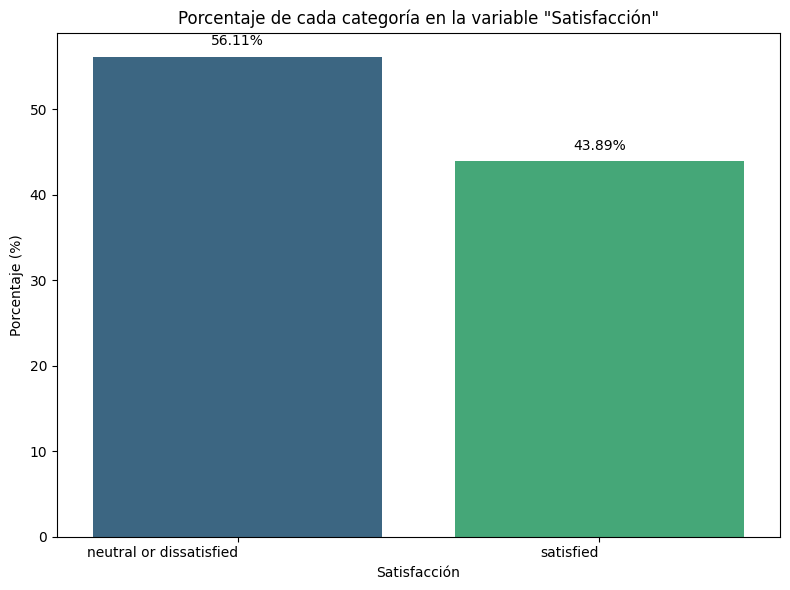

Porcentajes:
neutral or dissatisfied    56.11
satisfied                  43.89
Name: satisfaccion, dtype: float64


In [ ]:
# Calcular el porcentaje de cada categoría en la variable "Objetivo"
objetivo_porcentajes = (df_final['satisfaccion'].value_counts(normalize=True) * 100).round(2)

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=objetivo_porcentajes.index, y=objetivo_porcentajes.values, palette='viridis')

# Personalizar el gráfico
plt.xlabel('Satisfacción')
plt.ylabel('Porcentaje (%)')
plt.title('Porcentaje de cada categoría en la variable "Satisfacción"')
plt.xticks(rotation=0, ha='right')  # Rotar las etiquetas del eje x para una mejor visualización
plt.tight_layout()

# Agregar etiquetas de porcentaje en las barras
for index, value in enumerate(objetivo_porcentajes):
    ax.text(index, value + 1, f"{value}%", ha='center', va='bottom', fontsize=10)

plt.show()
print("Porcentajes:")
print(f"{objetivo_porcentajes}")

Analisis del contenido de cada columna

In [ ]:
# Iterar a través de las columnas del DataFrame e imprimir los valores únicos
for column in df_final.columns:
    unique_values = df_final[column].unique()
    print(f"Valores únicos en la columna {column}:\n{unique_values}\n")

Valores únicos en la columna Nro de Registro:
[    0     1     2 ... 25973 25974 25975]

Valores únicos en la columna id:
[19556 90035 12360 ... 37675 90086 34799]

Valores únicos en la columna Genero:
['Female' 'Male']

Valores únicos en la columna Tipo_de_Cliente:
['Loyal Customer' 'disloyal Customer']

Valores únicos en la columna Edad:
[52 36 20 44 49 16 77 43 47 46 33 60 50 31 55 25 30 62 24 22 51 56 41 53
 12 39 32 40 42 28 59 58 27 67 70 66 19 69 35 54 26 61 21 37 45 38  7 34
 17 15 48 13 11 29  8 18 23 65 57 80 64  9 14 68 10 79 63 73 74 71 72 76
 78 75 85]

Valores únicos en la columna Tipo_de_Viaje:
['Business travel' 'Personal Travel']

Valores únicos en la columna Clase:
['Eco' 'Business' 'Eco Plus']

Valores únicos en la columna Distancia_del_Vuelo:
[ 160 2863  192 ... 3714 3097 3518]

Valores únicos en la columna Servicio_de_Wifi_a_Bordo:
[5 1 2 0 3 4]

Valores únicos en la columna Conveniencia_de_Hora_de_Salida_Llegada:
[4 1 0 3 5 2]

Valores únicos en la columna Facilid

In [ ]:
# Calcular la cantidad de hombres y mujeres en el DataFrame
contar_genero = df_final['Genero'].value_counts()

# Calcular el porcentaje de hombres y mujeres en el DataFrame
total_personas = contar_genero.sum()
percentaje_hombres = (contar_genero['Male'] / total_personas) * 100
percentaje_mujeres = (contar_genero['Female'] / total_personas) * 100

print(f"Porcentaje de hombres: {percentaje_hombres:.2f}%")
print(f"Porcentaje de mujeres: {percentaje_mujeres:.2f}%")

Porcentaje de hombres: 49.30%
Porcentaje de mujeres: 50.70%


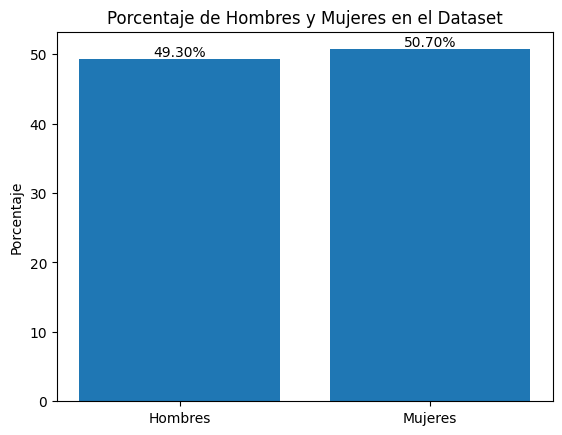

In [ ]:
# Graficar la cantidad de hombres y mujeres en el DataFrame
fig, ax = plt.subplots()
bars = ax.bar(['Hombres', 'Mujeres'], [percentaje_hombres, percentaje_mujeres])

# Agregar las etiquetas de porcentaje en las barras
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%', ha='center', va='bottom')

ax.set_ylabel('Porcentaje')
ax.set_title('Porcentaje de Hombres y Mujeres en el Dataset')
plt.show()


In [ ]:
# Crear una tabla dinámica para los tipos de clientes por género
pivot_table = pd.pivot_table(df_final,
                             index='Tipo_de_Cliente',
                             columns='Genero',
                             values='Nro de Registro',
                             aggfunc='count',
                             fill_value=0,
                             margins=True,
                             margins_name='Total')
pivot_table

Genero,Female,Male,Total
Tipo_de_Cliente,,,
Loyal Customer,10563,10548,21111
disloyal Customer,2564,2218,4782
Total,13127,12766,25893


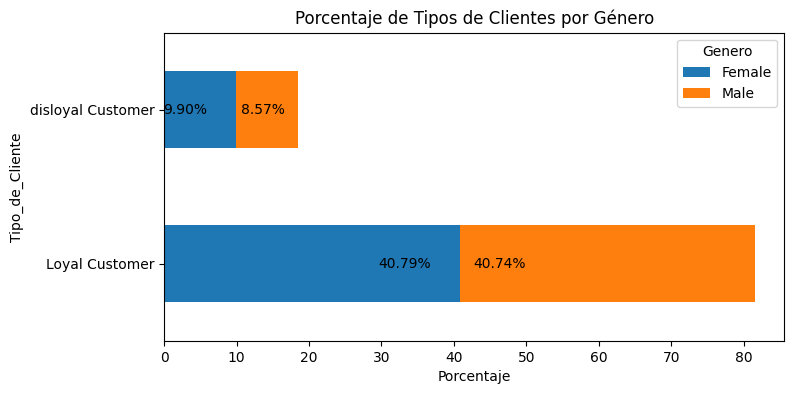

Genero,Female,Male
Tipo_de_Cliente,,
Loyal Customer,10563,10548
disloyal Customer,2564,2218


In [ ]:
# Crear una tabla dinámica para los tipos de clientes por género
pivot_table_simple = pd.pivot_table(df_final,
                                    index='Tipo_de_Cliente',
                                    columns='Genero',
                                    values='Nro de Registro',
                                    aggfunc='count',
                                    fill_value=0
                                    )

# Calcular los porcentajes
total = pivot_table_simple.sum().sum()
pivot_table_percent = pivot_table_simple / total * 100

# Crear un gráfico de barras horizontales apiladas
ax = pivot_table_percent.plot(kind='barh', stacked=True, figsize=(8, 4))

# Agregar etiquetas de porcentaje a la derecha de las barras (hombres) y a la izquierda de las barras (mujeres)
for col in pivot_table_percent.columns:
    x_offset = 2 if col == 'Male' else -4

    ha = 'left' if col == 'Male' else 'right'

    for idx, val in enumerate(pivot_table_percent[col]):
        ax.text(val + x_offset, idx, f'{val:.2f}%', ha=ha, va='center', fontsize=10, color='black')

ax.set_xlabel('Porcentaje')
ax.set_title('Porcentaje de Tipos de Clientes por Género')
plt.show()
pivot_table_simple

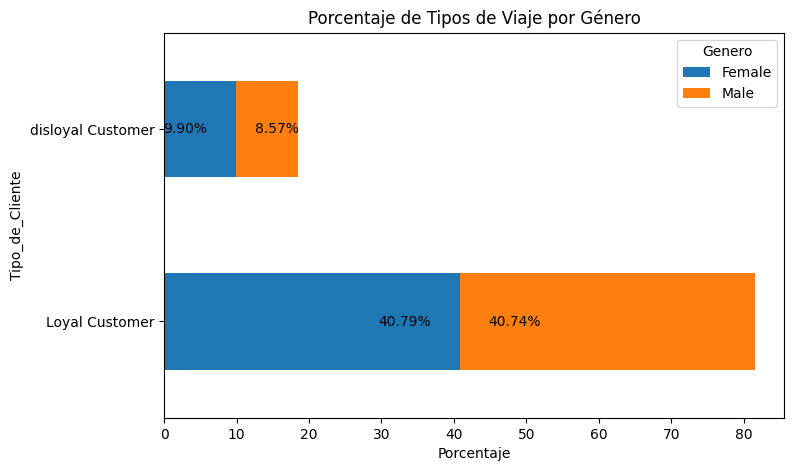

In [ ]:
# Calcular la cantidad de cada tipo de viaje
tipo_viaje_counts = df_final['Tipo_de_Viaje'].value_counts()

# Calcular los porcentajes
total = pivot_table_simple.sum().sum()
pivot_table_percent = pivot_table_simple / total * 100

# Crear una tabla dinámica para los tipos de clientes por género
pivot_table_simple = pd.pivot_table(df_final,
                                    index='Tipo_de_Viaje',
                                    columns='Genero',
                                    values='Nro de Registro',
                                    aggfunc='count',
                                    fill_value=0)

# Crear un gráfico de barras horizontales apiladas
ax = pivot_table_percent.plot(kind='barh', stacked=True, figsize=(8, 5))

# Agregar etiquetas de porcentaje a la derecha de las barras (hombres) y a la izquierda de las barras (mujeres)
for col in pivot_table_percent.columns:
    x_offset = 4 if col == 'Male' else -4

    ha = 'left' if col == 'Male' else 'right'

    for idx, val in enumerate(pivot_table_percent[col]):
        ax.text(val + x_offset,
                idx,
                f'{val:.2f}%',
                ha=ha, va='center',
                fontsize=10,
                color='black')

ax.set_xlabel('Porcentaje')
ax.set_title('Porcentaje de Tipos de Viaje por Género')
plt.show()

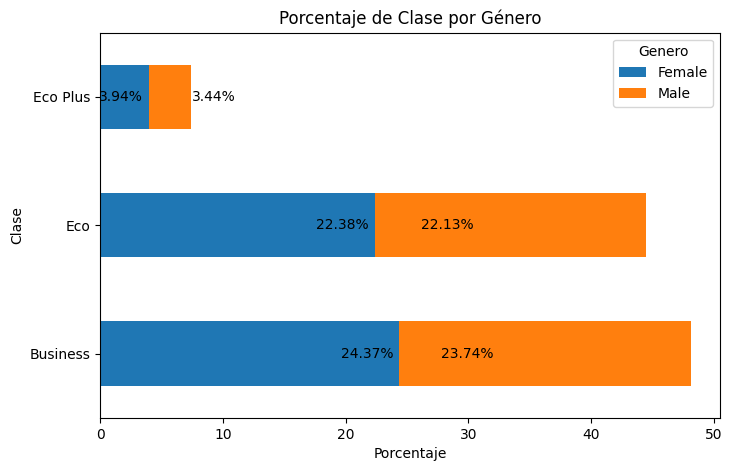

Genero,Female,Male
Clase,,
Business,6311,6146
Eco,5795,5729
Eco Plus,1021,891


In [ ]:
# Crear una tabla dinámica para los tipos de clase por género
pivot_table_simple = pd.pivot_table(df_final,
                                    index='Clase',
                                    columns='Genero',
                                    values='Nro de Registro',
                                    aggfunc='count',
                                    fill_value=0)
# Calcular los porcentajes
total = pivot_table_simple.sum().sum()
pivot_table_percent = pivot_table_simple / total * 100


# Crear un gráfico de barras horizontales apiladas
ax = pivot_table_percent.plot(kind='barh', stacked=True, figsize=(8, 5))

# Agregar etiquetas de porcentaje a la derecha de las barras (hombres) y a la izquierda de las barras (mujeres)
for col in pivot_table_percent.columns:
    x_offset = 4 if col == 'Male' else -0.5

    ha = 'left' if col == 'Male' else 'right'

    for idx, val in enumerate(pivot_table_percent[col]):
        ax.text(val + x_offset,
                idx,
                f'{val:.2f}%',
                ha=ha, va='center',
                fontsize=10,
                color='black')

ax.set_xlabel('Porcentaje')
ax.set_title('Porcentaje de Clase por Género')
plt.show()
pivot_table_simple

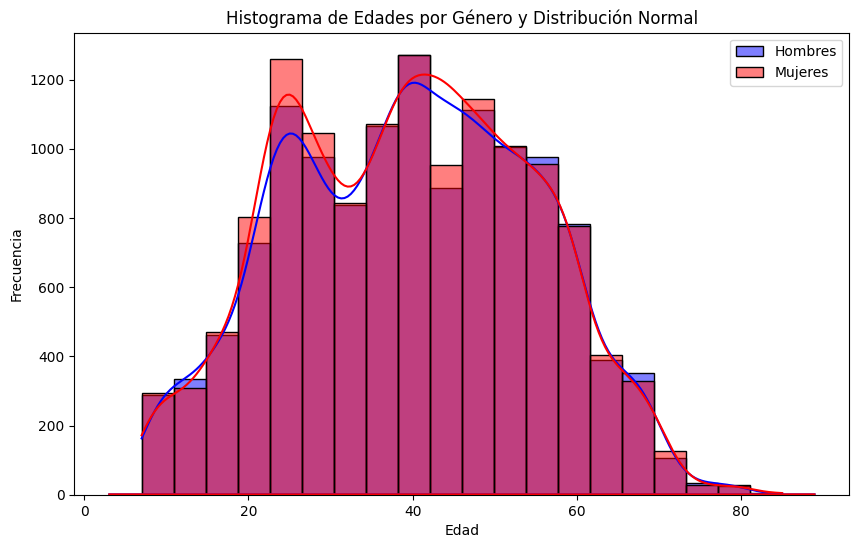

In [ ]:
# Filtrar el DataFrame por género
df_male = df_final[df_final['Genero'] == 'Male']
df_female = df_final[df_final['Genero'] == 'Female']

# Crear histogramas de edades por género
plt.figure(figsize=(10, 6))
sns.histplot(data=df_male, x='Edad', bins=20, kde=True, color='blue', label='Hombres')
sns.histplot(data=df_female, x='Edad', bins=20, kde=True, color='red', label='Mujeres')

# Calcular la distribución normal por género
mu_male, std_male = norm.fit(df_male['Edad'])
mu_female, std_female = norm.fit(df_female['Edad'])

# Agregar las líneas de distribución normal
xmin, xmax = plt.xlim()
x_male = np.linspace(xmin, xmax, 100)
p_male = norm.pdf(x_male, mu_male, std_male)
plt.plot(x_male, p_male, 'blue', linewidth=2)

x_female = np.linspace(xmin, xmax, 100)
p_female = norm.pdf(x_female, mu_female, std_female)
plt.plot(x_female, p_female, 'red', linewidth=2)

# Agregar leyenda y título
plt.legend()
plt.title('Histograma de Edades por Género y Distribución Normal')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()


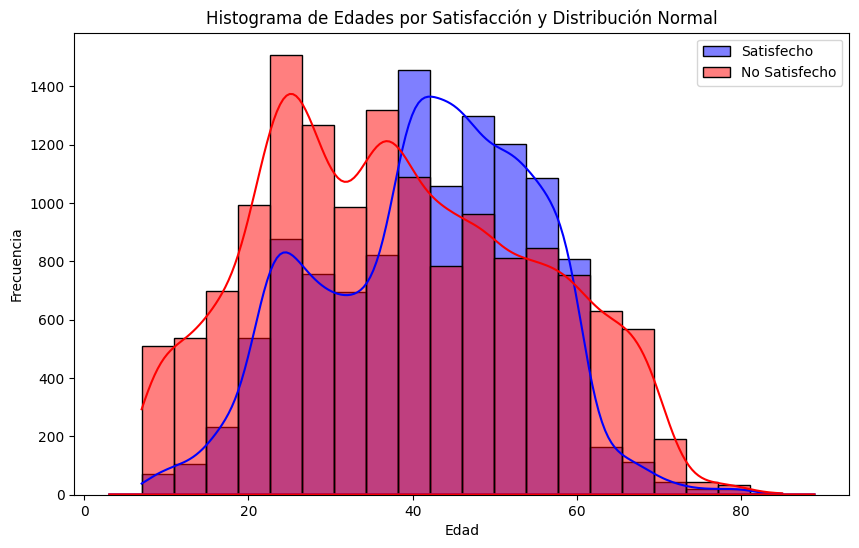

In [ ]:
# Filtrar el DataFrame por satisfacción
df_satisfied = df_final[df_final['satisfaccion'] == 'satisfied']
df_not_satisfied = df_final[df_final['satisfaccion'] == 'neutral or dissatisfied']

# Crear histogramas de edades por satisfacción
plt.figure(figsize=(10, 6))
sns.histplot(data=df_satisfied, x='Edad', bins=20, kde=True, color='blue', label='Satisfecho')
sns.histplot(data=df_not_satisfied, x='Edad', bins=20, kde=True, color='red', label='No Satisfecho')

# Calcular la distribución normal por satisfacción
mu_satisfied, std_satisfied = norm.fit(df_satisfied['Edad'])
mu_not_satisfied, std_not_satisfied = norm.fit(df_not_satisfied['Edad'])

# Agregar las líneas de distribución normal
xmin, xmax = plt.xlim()
x_satisfied = np.linspace(xmin, xmax, 100)
p_satisfied = norm.pdf(x_satisfied, mu_satisfied, std_satisfied)
plt.plot(x_satisfied, p_satisfied, 'blue', linewidth=2)

x_not_satisfied = np.linspace(xmin, xmax, 100)
p_not_satisfied = norm.pdf(x_not_satisfied, mu_not_satisfied, std_not_satisfied)
plt.plot(x_not_satisfied, p_not_satisfied, 'red', linewidth=2)

plt.legend()
plt.title('Histograma de Edades por Satisfacción y Distribución Normal')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

Generar Graficos de:Hombres Satisfechos,Hombres No Satisfechos,Mujeres Satisfechas,Mujeres No Satisfechas

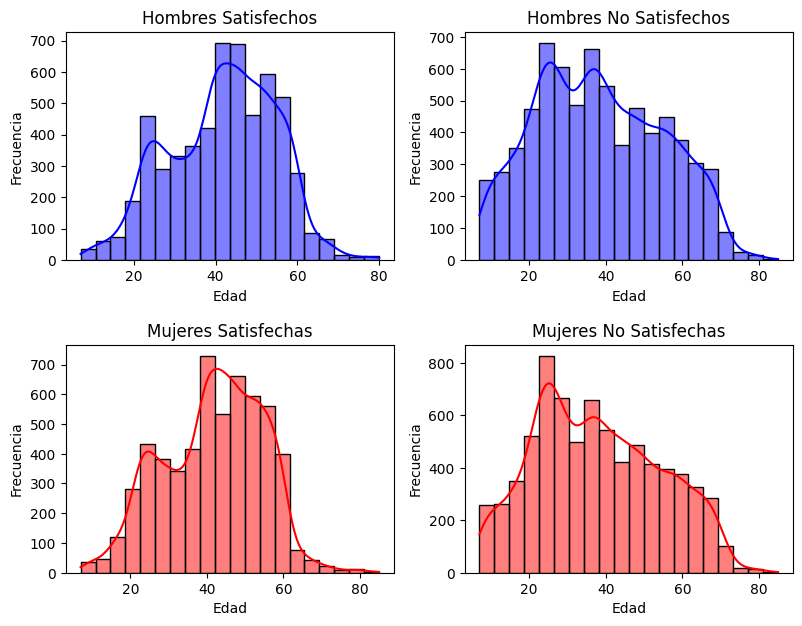

In [ ]:
# Filtrar el DataFrame por satisfacción y género
df_satisfied_male = df_final[(df_final['satisfaccion'] == 'satisfied') & (df_final['Genero'] == 'Male')]
df_not_satisfied_male = df_final[(df_final['satisfaccion'] == 'neutral or dissatisfied') & (df_final['Genero'] == 'Male')]
df_satisfied_female = df_final[(df_final['satisfaccion'] == 'satisfied') & (df_final['Genero'] == 'Female')]
df_not_satisfied_female = df_final[(df_final['satisfaccion'] == 'neutral or dissatisfied') & (df_final['Genero'] == 'Female')]

# Crear matriz de gráficos con espacio entre ellos
fig, axes = plt.subplots(2, 2, figsize=(8, 6))
fig.tight_layout(h_pad=4, w_pad=2)

# Función para crear un histograma en un eje dado
def create_histogram(ax, data, title, color):
    sns.histplot(data=data, x='Edad', bins=20, kde=True, color=color, ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Edad')
    ax.set_ylabel('Frecuencia')

# Crear histogramas en cada eje
create_histogram(axes[0, 0], df_satisfied_male, 'Hombres Satisfechos', 'blue')
create_histogram(axes[0, 1], df_not_satisfied_male, 'Hombres No Satisfechos', 'blue')
create_histogram(axes[1, 0], df_satisfied_female, 'Mujeres Satisfechas', 'red')
create_histogram(axes[1, 1], df_not_satisfied_female, 'Mujeres No Satisfechas', 'red')

plt.show()

In [ ]:
# # Filtrar el DataFrame por género
# pivot_table = df_final.pivot_table(index='Categoria_Edad',
#                                    columns='Genero',
#                                    values='Nro de Registro',
#                                    aggfunc='count',
#                                    fill_value=0,
#                                    margins=True,
#                                    margins_name='Total')
# print(pivot_table)

# # Crear un gráfico de barras para la tabla dinámica
# ax = pivot_table.plot(kind='bar', figsize=(10, 6))
# ax.set_ylabel('Cantidad')
# ax.set_xlabel('Categoría de Edad')
# ax.set_title('Distribución de Edades por Género y Categoría')
# plt.show()

In [ ]:
# # Filtrar el DataFrame por género
# pivot_table = df_final.pivot_table(index='Categoria_Distancia',
#                                    columns='Genero',
#                                    values='Nro de Registro',
#                                    aggfunc='count',
#                                    fill_value=0,
#                                    margins=True,
#                                    margins_name='Total')

# print(pivot_table)

# ax = pivot_table.plot(kind='bar', figsize=(10, 6))
# ax.set_ylabel('Cantidad')
# ax.set_xlabel('Categoría de Distancia')
# ax.set_title('Distribución de Distancias por Género y Categoría')
# plt.show()

Analisis de Satisfaccion en funcion de las calificaciones encuestadas por los pasajeros

                         Comida_y_Bebida  Comodidad_del_Asiento  \
satisfaccion                                                      
neutral or dissatisfied         2.959182               3.044397   
satisfied                       3.541839               3.965948   

                         Conveniencia_de_Hora_de_Salida_Llegada  \
satisfaccion                                                      
neutral or dissatisfied                                3.134912   
satisfied                                              2.933304   

                         Embarque_en_Linea  Entretenimiento_a_Bordo  \
satisfaccion                                                          
neutral or dissatisfied           2.668984                 2.884705   
satisfied                         4.019182                 3.960669   

                         Facilidad_de_Reserva_en_Linea  Limpieza  \
satisfaccion                                                       
neutral or dissatisfied                  

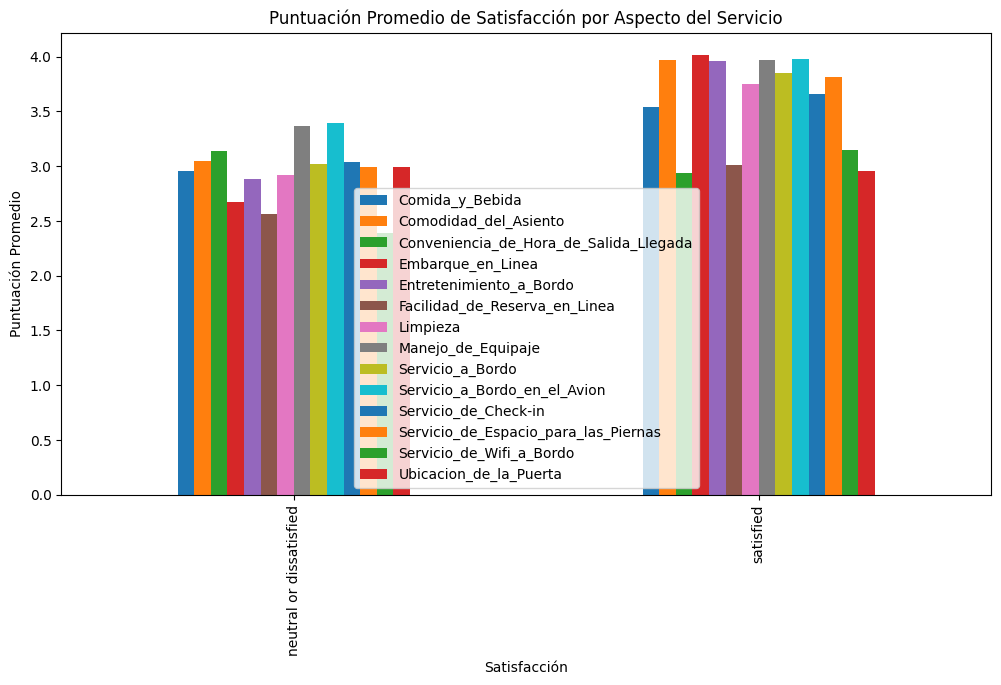

In [ ]:

# Definir las columnas relacionadas con la satisfacción
satisfaction_columns = ['Servicio_de_Wifi_a_Bordo', 'Conveniencia_de_Hora_de_Salida_Llegada',
                        'Facilidad_de_Reserva_en_Linea', 'Ubicacion_de_la_Puerta',
                        'Comida_y_Bebida', 'Embarque_en_Linea', 'Comodidad_del_Asiento',
                        'Entretenimiento_a_Bordo', 'Servicio_a_Bordo', 'Servicio_de_Espacio_para_las_Piernas',
                        'Manejo_de_Equipaje', 'Servicio_de_Check-in', 'Servicio_a_Bordo_en_el_Avion', 'Limpieza']

# Crear una tabla dinámica con las columnas de satisfacción
pivot_table = df_final.pivot_table(index='satisfaccion', values=satisfaction_columns, aggfunc='mean')

print(pivot_table)

ax = pivot_table.plot(kind='bar', figsize=(12, 6))
ax.set_ylabel('Puntuación Promedio')
ax.set_xlabel('Satisfacción')
ax.set_title('Puntuación Promedio de Satisfacción por Aspecto del Servicio')
plt.show()

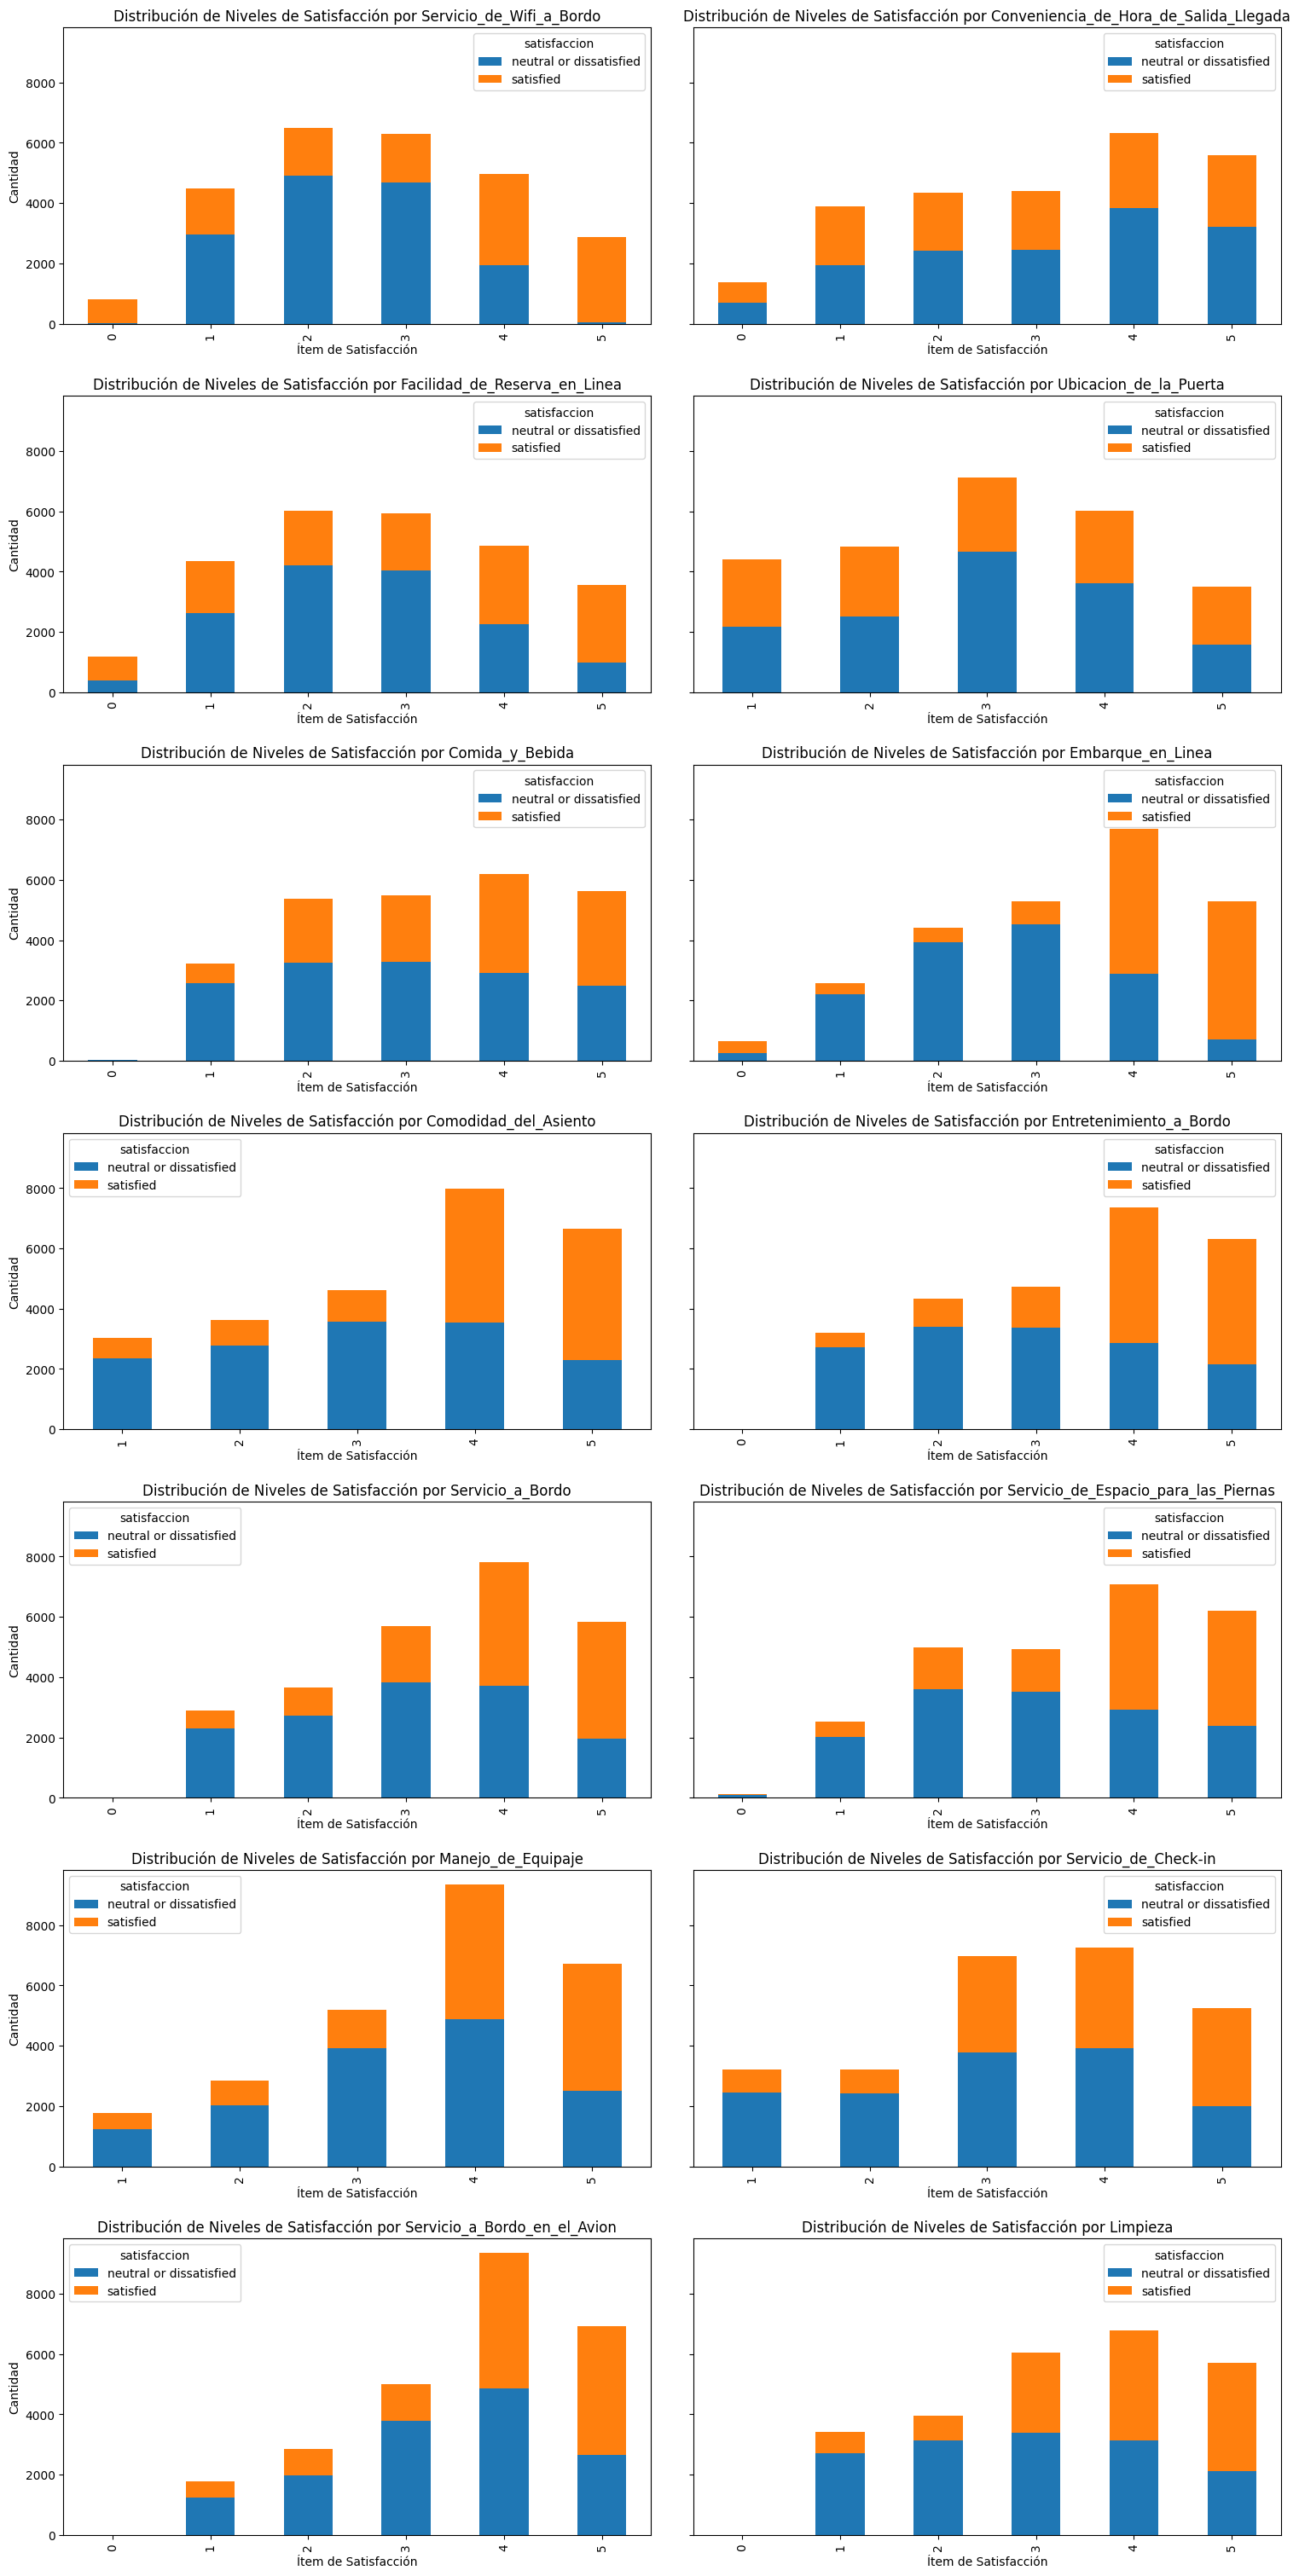

In [ ]:
# Definir las columnas relacionadas con la satisfacción y los niveles de satisfacción
satisfaction_columns = ['Servicio_de_Wifi_a_Bordo', 'Conveniencia_de_Hora_de_Salida_Llegada',
                        'Facilidad_de_Reserva_en_Linea', 'Ubicacion_de_la_Puerta',
                        'Comida_y_Bebida', 'Embarque_en_Linea', 'Comodidad_del_Asiento',
                        'Entretenimiento_a_Bordo', 'Servicio_a_Bordo', 'Servicio_de_Espacio_para_las_Piernas',
                        'Manejo_de_Equipaje', 'Servicio_de_Check-in', 'Servicio_a_Bordo_en_el_Avion', 'Limpieza']

satisfaction_levels = [0, 1, 2, 3, 4, 5]

# Crear una matriz de gráficos con espacio entre ellos
num_rows = int(np.ceil(len(satisfaction_columns) / 2))
fig, axes = plt.subplots(num_rows, 2, figsize=(15,30), sharey=True)
fig.tight_layout(h_pad=4, w_pad=2)  # Espacios vertical y horizontal entre gráficos

# Generar tablas dinámicas y gráficos para cada columna en satisfaction_columns
for i, column in enumerate(satisfaction_columns):
    row = i // 2
    col = i % 2

    # Crear una tabla dinámica usando groupby y unstack
    pivot_table = df_final.groupby([column])['satisfaccion'].value_counts().unstack(fill_value=0)
    pivot_table
    # Crear un gráfico de barras para la tabla
    ax = pivot_table.plot(kind='bar', stacked=True, ax=axes[row, col])
    ax.set_ylabel('Cantidad')
    ax.set_xlabel('Ítem de Satisfacción')
    ax.set_title(f'Distribución de Niveles de Satisfacción por {column}')

plt.show()

In [ ]:
# Definir las columnas relacionadas con la satisfacción y los niveles de satisfacción
satisfaction_columns = ['Servicio_de_Wifi_a_Bordo', 'Conveniencia_de_Hora_de_Salida_Llegada',
                        'Facilidad_de_Reserva_en_Linea', 'Ubicacion_de_la_Puerta',
                        'Comida_y_Bebida', 'Embarque_en_Linea', 'Comodidad_del_Asiento',
                        'Entretenimiento_a_Bordo', 'Servicio_a_Bordo', 'Servicio_de_Espacio_para_las_Piernas',
                        'Manejo_de_Equipaje', 'Servicio_de_Check-in', 'Servicio_a_Bordo_en_el_Avion', 'Limpieza']

satisfaction_levels = [0, 1, 2, 3, 4, 5]

# Generar tablas dinámicas para cada columna en satisfaction_columns
for i, column in enumerate(satisfaction_columns):
    # Crear una tabla dinámica usando groupby y unstack
    pivot_table = df_final.groupby([column])['satisfaccion'].value_counts().unstack(fill_value=0)
    print(pivot_table)

satisfaccion              neutral or dissatisfied  satisfied
Servicio_de_Wifi_a_Bordo                                    
0                                               2        810
1                                            2953       1516
2                                            4915       1566
3                                            4680       1618
4                                            1943       3022
5                                              35       2833
satisfaccion                            neutral or dissatisfied  satisfied
Conveniencia_de_Hora_de_Salida_Llegada                                    
0                                                           680        694
1                                                          1932       1967
2                                                          2418       1918
3                                                          2439       1960
4                                                          383

In [ ]:
# Crear un diccionario para almacenar los recuentos de satisfacción por columna
satisfaction_counts = {}

# Iterar a través de cada columna de satisfacción
for column in satisfaction_columns:
    # Contar la cantidad de ocurrencias de cada nivel de satisfacción en la columna
    counts = df_final[column].value_counts().sort_index()

    # Asegurarse de que todos los niveles de satisfacción estén representados en el recuento
    for level in satisfaction_levels:
        if level not in counts.index:
            counts[level] = 0

    # Ordenar los recuentos por nivel de satisfacción
    counts = counts.sort_index()

    # Agregar los recuentos al diccionario
    satisfaction_counts[column] = counts

# Crear un nuevo DataFrame a partir del diccionario de recuentos
summary_df = pd.DataFrame(satisfaction_counts)
summary_df

,Servicio_de_Wifi_a_Bordo,Conveniencia_de_Hora_de_Salida_Llegada,Facilidad_de_Reserva_en_Linea,Ubicacion_de_la_Puerta,Comida_y_Bebida,Embarque_en_Linea,Comodidad_del_Asiento,Entretenimiento_a_Bordo,Servicio_a_Bordo,Servicio_de_Espacio_para_las_Piernas,Manejo_de_Equipaje,Servicio_de_Check-in,Servicio_a_Bordo_en_el_Avion,Limpieza
0,812,1374,1193,0,25,651,0,4,2,126,0,0,2,2
1,4469,3899,4342,4415,3210,2558,3028,3193,2906,2536,1785,3206,1775,3404
2,6481,4336,6021,4823,5375,4417,3616,4318,3658,5000,2833,3202,2838,3968
3,6298,4399,5927,7122,5474,5296,4617,4725,5690,4940,5204,6987,5005,6046
4,4965,6312,4854,6023,6183,7682,7969,7347,7814,7075,9357,7254,9352,6771
5,2868,5573,3556,3510,5626,5289,6663,6306,5823,6216,6714,5244,6921,5702


In [ ]:
# Definir valores de ponderación para cada nivel (pueden ser iguales o diferentes)
weighting_factors = [0.5, 1, 1.5, 2, 2.5, 3]

# Calcular la suma ponderada considerando los valores de ponderación
weighted_sum = (summary_df['Servicio_de_Wifi_a_Bordo'] * weighting_factors).sum()

# Calcular la suma máxima posible (si todos los votos fueran nivel 5)
max_possible_sum = (summary_df['Servicio_de_Wifi_a_Bordo'] * weighting_factors[-1]).sum()

# Calcular la proporción de aceptación en general
acceptance_ratio = weighted_sum / max_possible_sum

# Mostrar el resultado
print("Proporción de aceptación en general:", acceptance_ratio)
print('weighted_sum',weighted_sum)
print('max_possible_sum',max_possible_sum)

Proporción de aceptación en general: 0.6206181850950707
weighted_sum 48209.0
max_possible_sum 77679


In [ ]:
# Usamos el DataFrame summary_df con los recuentos de satisfacción

# Definir valores de ponderación para cada nivel (pueden ser iguales o diferentes)
factor_peso = [0.5, 1, 1.5, 2, 2.5, 3]

# Crear un nuevo DataFrame para almacenar los resultados
Ratios = pd.DataFrame(index=summary_df.columns, columns=['Ratio de Aceptacion'])

# Calcular la proporción de aceptación en general para cada columna
for column in summary_df.columns:
    # Calcular la suma ponderada considerando los valores de ponderación
    Peso_Ponderado = (summary_df[column] * factor_peso).sum()

    # Calcular la suma máxima posible (si todos los votos fueran nivel 5)
    max_posible_sum = (summary_df[column] * factor_peso[-1]).sum()

    # Calcular la proporción de aceptación en general
    ratio_Aceptacion = Peso_Ponderado / max_posible_sum

    # Almacenar la proporción de aceptación en el nuevo DataFrame
    Ratios.at[column, 'Ratio de Aceptacion'] = ratio_Aceptacion

print(Ratios)

                                       Ratio de Aceptacion
Servicio_de_Wifi_a_Bordo                          0.620618
Conveniencia_de_Hora_de_Salida_Llegada            0.674404
Facilidad_de_Reserva_en_Linea                     0.625999
Ubicacion_de_la_Puerta                             0.66274
Comida_y_Bebida                                   0.702487
Embarque_en_Linea                                 0.710269
Comodidad_del_Asiento                             0.741481
Entretenimiento_a_Bordo                           0.726162
Servicio_a_Bordo                                  0.730931
Servicio_de_Espacio_para_las_Piernas              0.724964
Manejo_de_Equipaje                                0.772113
Servicio_de_Check-in                              0.718985
Servicio_a_Bordo_en_el_Avion                      0.774804
Limpieza                                          0.714254


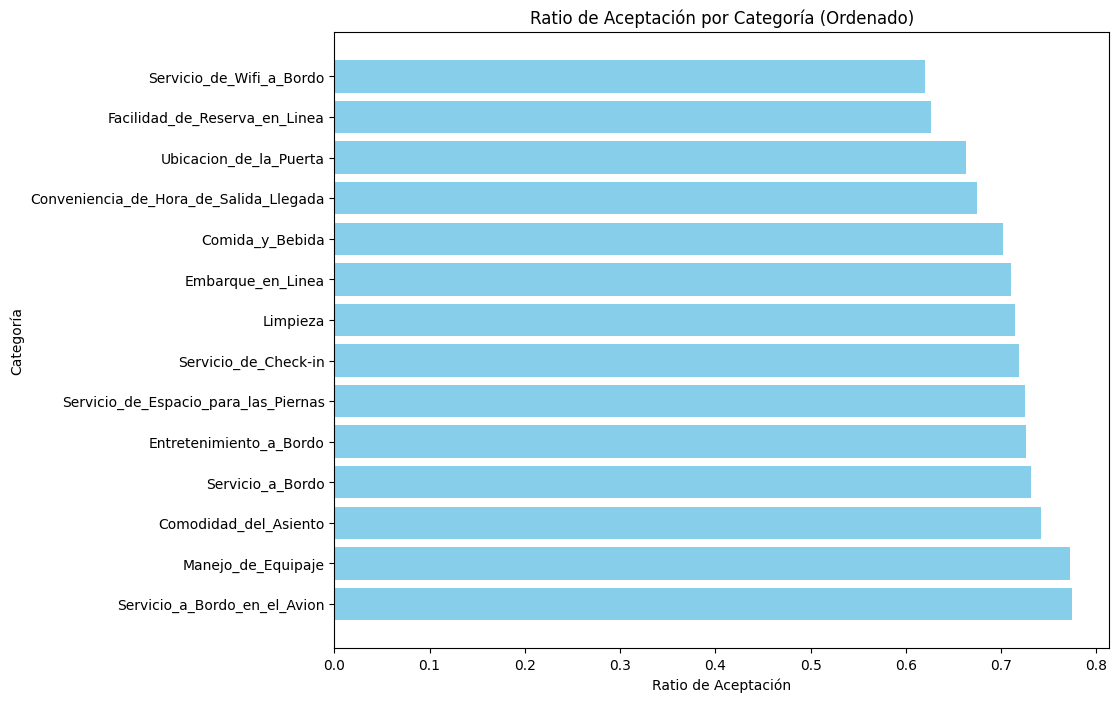

In [ ]:
# Usamos el DataFrame Ratios con los ratios de aceptación
# Ordenar el DataFrame por el ratio de aceptación de manera descendente
sorted_ratios = Ratios.sort_values(by='Ratio de Aceptacion', ascending=False)

# Crear el gráfico de barras horizontales
plt.figure(figsize=(10, 8))
plt.barh(sorted_ratios.index, sorted_ratios['Ratio de Aceptacion'], color='skyblue')
plt.xlabel('Ratio de Aceptación')
plt.ylabel('Categoría')
plt.title('Ratio de Aceptación por Categoría (Ordenado)')
plt.show()

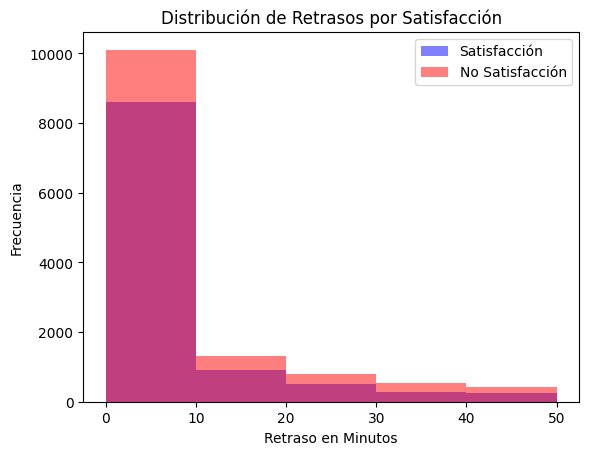

In [ ]:
# Filtrar los datos por satisfacción y no satisfacción
satisfaccion = df_final[df_final['satisfaccion'] == 'satisfied']
no_satisfaccion = df_final[df_final['satisfaccion'] == 'neutral or dissatisfied']

# Crear histogramas con límites de bins ajustados y colores personalizados
plt.hist(satisfaccion['Retraso_en_la_Salida_en_Minutos'], bins=range(0, 51, 10), alpha=0.5, color='blue', label='Satisfacción')
plt.hist(no_satisfaccion['Retraso_en_la_Salida_en_Minutos'], bins=range(0, 51, 10), alpha=0.5, color='red', label='No Satisfacción')

# Agregar etiquetas y título
plt.xlabel('Retraso en Minutos')
plt.ylabel('Frecuencia')
plt.title('Distribución de Retrasos por Satisfacción')
plt.legend()

plt.show()

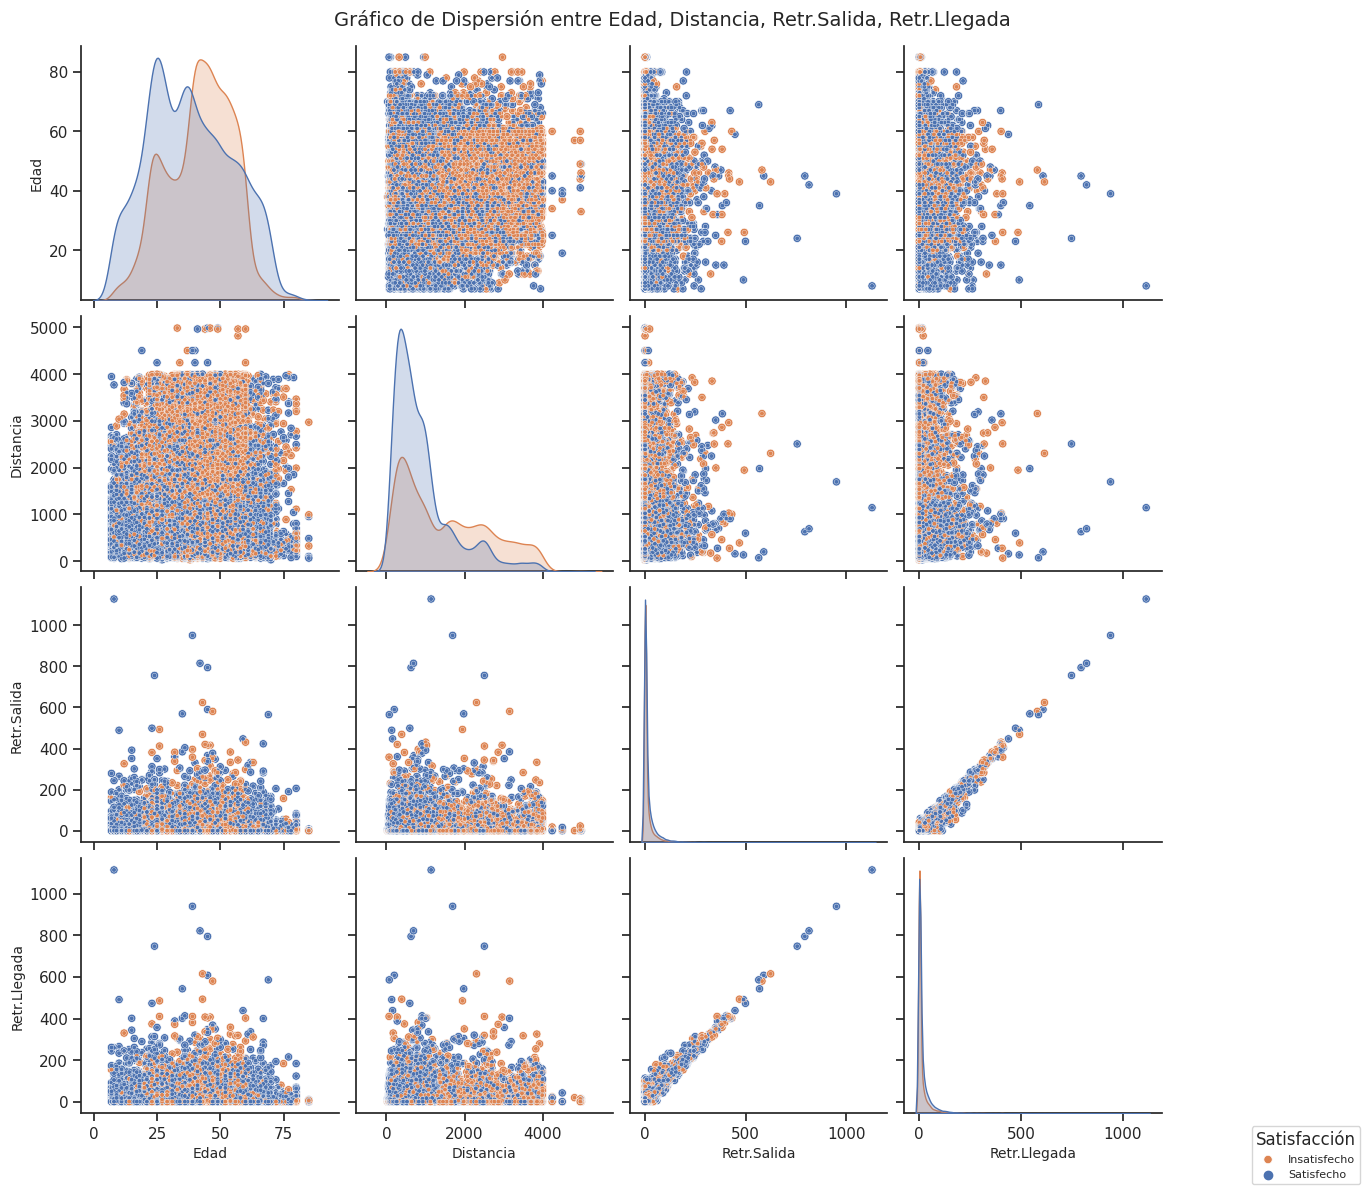

In [ ]:
# Columnas seleccionadas
selected_columns = ["Edad", "Distancia_del_Vuelo", "Retraso_en_la_Salida_en_Minutos", "Retraso_en_la_Llegada_en_Minutos"]
selected_columns_titulos_x = ["Edad", "Distancia", "Retr.Salida", "Retr.Llegada"]
selected_columns_titulos_y = ["Edad", "Distancia", "Retr.Salida", "Retr.Llegada"]

# Crear una matriz de gráficos de dispersión con las columnas seleccionadas
sns.set(style='ticks')
g = sns.pairplot(df_final, hue='Satisfaccion_binaria', vars=selected_columns, height=3)

# Cambiar el tamaño de los puntos en los gráficos de dispersión
g._legend.remove()  # Para eliminar la leyenda por ahora
g._margin_titles = True
g.map_offdiag(sns.scatterplot, s=10)  # Ajustar el tamaño de los puntos

# Cambiar las etiquetas de los ejes de acuerdo con las especificaciones
for i in range(len(selected_columns)):
    for j in range(len(selected_columns)):
        g.axes[j, i].set_xlabel(selected_columns_titulos_x[i], fontsize=10)
        g.axes[j, i].set_ylabel(selected_columns_titulos_y[j], fontsize=10)

# Agregar un título general y ajustar espaciado
plt.subplots_adjust(top=0.95)  # Espacio para el título general
g.fig.suptitle('Gráfico de Dispersión entre Edad, Distancia, Retr.Salida, Retr.Llegada', fontsize=14)

# Cambiar el tamaño de la etiqueta de satisfacción
g.fig.legend(loc='lower right', title='Satisfacción', labels=['Insatisfecho', 'Satisfecho'], fontsize=8)

plt.show()

# Separacion entre test y train para los diferentes modelos para el primer Ensamble

In [ ]:
 df_final_codificado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25893 entries, 0 to 25975
Data columns (total 39 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Nro de Registro                         25893 non-null  int64  
 1   id                                      25893 non-null  int64  
 2   Edad                                    25893 non-null  int64  
 3   Distancia_del_Vuelo                     25893 non-null  int64  
 4   Servicio_de_Wifi_a_Bordo                25893 non-null  int64  
 5   Conveniencia_de_Hora_de_Salida_Llegada  25893 non-null  int64  
 6   Facilidad_de_Reserva_en_Linea           25893 non-null  int64  
 7   Ubicacion_de_la_Puerta                  25893 non-null  int64  
 8   Comida_y_Bebida                         25893 non-null  int64  
 9   Embarque_en_Linea                       25893 non-null  int64  
 10  Comodidad_del_Asiento                   25893 non-null  in

In [ ]:
X = df_final_codificado.drop(columns=['Satisfaccion_binaria','satisfaccion','Nro de Registro','id','Edad', 'Distancia_del_Vuelo', 'Genero_Male'], axis=1)  # Características
y = df_final_codificado['Satisfaccion_binaria']  # Variable objetivo

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size =0.2)

In [ ]:
# Estandarizar las features para los conjuntos traint y test
scaler = StandardScaler()
X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.transform(X_test)

In [ ]:
# folds para cv
folds = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

In [ ]:
X.columns

Index(['Servicio_de_Wifi_a_Bordo', 'Conveniencia_de_Hora_de_Salida_Llegada',
       'Facilidad_de_Reserva_en_Linea', 'Ubicacion_de_la_Puerta',
       'Comida_y_Bebida', 'Embarque_en_Linea', 'Comodidad_del_Asiento',
       'Entretenimiento_a_Bordo', 'Servicio_a_Bordo',
       'Servicio_de_Espacio_para_las_Piernas', 'Manejo_de_Equipaje',
       'Servicio_de_Check-in', 'Servicio_a_Bordo_en_el_Avion', 'Limpieza',
       'Retraso_en_la_Salida_en_Minutos', 'Retraso_en_la_Llegada_en_Minutos',
       'Genero_Female', 'Tipo_de_Cliente_Loyal Customer',
       'Tipo_de_Cliente_disloyal Customer', 'Tipo_de_Viaje_Business travel',
       'Tipo_de_Viaje_Personal Travel', 'Clase_Business', 'Clase_Eco',
       'Clase_Eco Plus', 'Categoria_Edad_niño', 'Categoria_Edad_joven',
       'Categoria_Edad_adulto', 'Categoria_Edad_adulto mayor',
       'Categoria_Distancia_corta distancia',
       'Categoria_Distancia_media distancia',
       'Categoria_Distancia_larga distancia',
       'Categoria_Distancia_ex

# Funciones útiles

Para comparar curvas ROC

In [ ]:
def Comparar_Curvas_ROC(model_1, model_2, model_3, model_4 = 'null'):
  y_prob_model_1 = model_1.predict_proba(X_test_scl)[:, 1]
  y_prob_model_2 = model_2.predict_proba(X_test_scl)[:, 1]
  y_prob_model_3 = model_3.predict_proba(X_test_scl)[:, 1]

  fpr_model_1, tpr_model_1, _ = roc_curve(y_test, y_prob_model_1)
  roc_auc_model_1 = roc_auc_score(y_test, y_prob_model_1)

  fpr_model_2, tpr_model_2, _ = roc_curve(y_test, y_prob_model_2)
  roc_auc_model_2 = roc_auc_score(y_test, y_prob_model_2)

  fpr_model_3, tpr_model_3, _ = roc_curve(y_test, y_prob_model_3)
  roc_auc_model_3 = roc_auc_score(y_test, y_prob_model_3)

  if model_4 != 'null':
    y_prob_model_4 = model_4.predict_proba(X_test_scl)[:, 1]
    fpr_model_4, tpr_model_4, _ = roc_curve(y_test, y_prob_model_4)
    roc_auc_model_4 = roc_auc_score(y_test, y_prob_model_4)
    plt.figure()
    plt.plot(fpr_model_1, tpr_model_1, color='darkorange', lw=2, label='{} (area = {:.2f})'.format(model_1.__class__.__name__, roc_auc_model_1))
    plt.plot(fpr_model_2, tpr_model_2, color='green', lw=2, label='{} (area = {:.2f})'.format(model_2.__class__.__name__, roc_auc_model_2))
    plt.plot(fpr_model_3, tpr_model_3, color='blue', lw=2, label='{} (area = {:.2f})'.format(model_3.__class__.__name__ ,roc_auc_model_3))
    plt.plot(fpr_model_4, tpr_model_4, color='red', lw=2, label='{} (area = {:.2f})'.format(model_4.__class__.__name__, roc_auc_model_4))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc='lower right')
    plt.show()
  else:
    plt.figure()
    plt.plot(fpr_model_1, tpr_model_1, color='darkorange', lw=2, label='{} (area = {:.2f})'.format(model_1.__class__.__name__, roc_auc_model_1))
    plt.plot(fpr_model_2, tpr_model_2, color='green', lw=2, label='{} (area = {:.2f})'.format(model_2.__class__.__name__, roc_auc_model_2))
    plt.plot(fpr_model_3, tpr_model_3, color='blue', lw=2, label='{} (area = {:.2f})'.format(model_3.__class__.__name__ ,roc_auc_model_3))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc='lower right')
    plt.show()

Para los ensambles

In [ ]:
def predict_ensamble(X, model_1, model_2, model_3='null', model_4='null'):
  y_pred_1 = model_1.predict(X)
  y_pred_2 = model_2.predict(X)
  if model_4 != 'null':
    y_pred_3 = model_3.predict(X)
    y_pred_4 = model_4.predict(X)
    result_mode = mode([y_pred_1, y_pred_2, y_pred_3, y_pred_4], keepdims=False).mode
    result = np.transpose(result_mode)
    return result
  elif model_3 != 'null':
    y_pred_3 = model_3.predict(X)
    result_mode = mode([y_pred_1, y_pred_2, y_pred_3], keepdims=False).mode
    result = np.transpose(result_mode)
    return result
  else:
    result_mode = mode([y_pred_1, y_pred_2], keepdims=False).mode
    result = np.transpose(result_mode)
    return result

# Clases Utiles

In [ ]:
class Evaluar_Modelos:
  param_rs_knn = {
    'n_neighbors': range(1, 50),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'cosine']
  }

  param_rs_tree = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 5],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random']
  }
  params_rs_bagging = {
    'n_estimators': [10, 50, 100, 150],
    'max_samples': [0.01, 0.6, 1.0],
    'max_features': [0.3, 0.6, 1.0],
    'bootstrap_features': [True, False]
  }

  def __init__(self, X_train_scl, y_train, X_test_scl, y_test, cv, X):
    self.X_train_scl = X_train_scl
    self.y_train = y_train
    self.X_test_scl = X_test_scl
    self.y_test = y_test
    self.cv = cv
    self.columns = X
    self.model_knn = KNeighborsClassifier().fit(self.X_train_scl, self.y_train)
    self.model_knn_rs = RandomizedSearchCV(self.model_knn, self.param_rs_knn, cv=self.cv, n_jobs=-1, random_state=42).fit(self.X_train_scl, self.y_train)
    self.model_tree = DecisionTreeClassifier().fit(self.X_train_scl, self.y_train)
    self.model_tree_rs = RandomizedSearchCV(self.model_tree, self.param_rs_tree, cv=self.cv, n_jobs=-1, random_state=42).fit(self.X_train_scl, self.y_train)
    self.base_bagg = BaggingClassifier(self.model_tree_rs.best_estimator_)
    self.model_bagg = self.base_bagg.fit(self.X_train_scl, self.y_train)
    self.model_bagg_rs = RandomizedSearchCV(self.model_bagg, self.params_rs_bagging, n_jobs=-1, cv = self.cv, random_state=42).fit(self.X_train_scl, self.y_train)
    self.model_rforest = RandomForestClassifier(random_state=42).fit(self.X_train_scl, self.y_train)
    self.model_xgb = xgb.XGBClassifier().fit(self.X_train_scl, self.y_train)
    self.model_gradient_boosting = GradientBoostingClassifier().fit(self.X_train_scl, self.y_train)
    self.model_ada = AdaBoostClassifier(self.model_tree_rs.best_estimator_).fit(self.X_train_scl, self.y_train)

  def reporte(self):
    output = (
        f"\033[1mPrecisión del tree con RandomizedSearchCV:\033[0m {accuracy_score(self.y_test, self.model_tree_rs.predict(self.X_test_scl))}\n"
        f"Mejores parámetros encontrados: {self.model_tree_rs.best_params_}\n"
        f"{classification_report(self.y_test, self.model_tree_rs.predict(self.X_test_scl))}\n"
        f"{confusion_matrix(self.y_test, self.model_tree_rs.predict(self.X_test_scl))}\n\n"
        f"\033[1mPrecision del bagg al mejor tree_rs:\033[0m {accuracy_score(self.y_test, self.model_bagg_rs.predict(self.X_test_scl))}\n"
        f"Mejores parámetros encontrados: {self.model_bagg_rs.best_params_}\n"
        f"{classification_report(self.y_test, self.model_bagg_rs.predict(self.X_test_scl))}\n"
        f"{confusion_matrix(self.y_test, self.model_bagg_rs.predict(self.X_test_scl))}\n\n"
        f"\033[1mPrecisión del modelo RandomForest:\033[0m {accuracy_score(self.y_test, self.model_rforest.predict(self.X_test_scl))}\n"
        f"{classification_report(self.y_test, self.model_rforest.predict(self.X_test_scl))}\n"
        f"{confusion_matrix(self.y_test, self.model_rforest.predict(self.X_test_scl))}\n\n"
        f"\033[1mPrecisión del modelo XGBoost:\033[0m {accuracy_score(self.y_test, self.model_xgb.predict(self.X_test_scl))}\n"
        f"{classification_report(self.y_test, self.model_xgb.predict(self.X_test_scl))}\n"
        f"{confusion_matrix(self.y_test, self.model_xgb.predict(self.X_test_scl))}\n\n"
        f"\033[1mPrecisión del modelo Ada al tree_rs:\033[0m {accuracy_score(self.y_test, self.model_ada.predict(self.X_test_scl))}\n"
        f"{classification_report(self.y_test, self.model_ada.predict(self.X_test_scl))}\n"
        f"{confusion_matrix(self.y_test, self.model_ada.predict(self.X_test_scl))}"
    )
    print(output)

  def features_importantes(self):
    output = (
        f"\033[1mModel Tree\033[0m\n"
        f"{pd.DataFrame({'atributo':X.columns, 'importancia':self.model_tree.feature_importances_}).sort_values('importancia', ascending = False)}\n"
        f"\n\033[1mModel Tree_rs\033[0m\n"
        f"{pd.DataFrame({'atributo':X.columns, 'importancia':self.model_tree_rs.best_estimator_.feature_importances_}).sort_values('importancia', ascending = False)}\n"
        f"\n\033[1mModel Bagg_rs\033[0m\n"
        f"{pd.DataFrame({'atributo':X.columns, 'importancia':self.model_bagg_rs.best_estimator_.estimators_[0].feature_importances_}).sort_values('importancia', ascending = False)}\n"
        f"\n\033[1mModel RForest\033[0m\n"
        f"{pd.DataFrame({'atributo':X.columns, 'importancia':self.model_rforest.feature_importances_}).sort_values('importancia', ascending = False)}\n"
        f"\n\033[1mModel XGB\033[0m\n"
        f"{pd.DataFrame({'atributo':X.columns, 'importancia':self.model_xgb.feature_importances_}).sort_values('importancia', ascending = False)}\n"
        f"\n\033[1mModel Ada\033[0m\n"
        f"{pd.DataFrame({'atributo':X.columns, 'importancia':self.model_ada.feature_importances_}).sort_values('importancia', ascending = False)}"
    )

    print(output)

  def top5_modelos(self):
    accuracy_scores = {}
    accuracy_scores['KNN'] = accuracy_score(self.y_test, self.model_knn.predict(self.X_test_scl))
    accuracy_scores['KNN_RS'] = accuracy_score(self.y_test, self.model_knn_rs.predict(self.X_test_scl))
    accuracy_scores['Decision Tree'] = accuracy_score(self.y_test, self.model_tree.predict(self.X_test_scl))
    accuracy_scores['Decision Tree_RS'] = accuracy_score(self.y_test, self.model_tree_rs.predict(self.X_test_scl))
    accuracy_scores['Bagging'] = accuracy_score(self.y_test, self.model_bagg.predict(self.X_test_scl))
    accuracy_scores['Bagging_RS'] = accuracy_score(self.y_test, self.model_bagg_rs.predict(self.X_test_scl))
    accuracy_scores['Random Forest'] = accuracy_score(self.y_test, self.model_rforest.predict(self.X_test_scl))
    accuracy_scores['XGBoost'] = accuracy_score(self.y_test, self.model_xgb.predict(self.X_test_scl))
    accuracy_scores['Gradient Boosting'] = accuracy_score(self.y_test, self.model_gradient_boosting.predict(self.X_test_scl))
    accuracy_scores['AdaBoost'] = accuracy_score(self.y_test, self.model_ada.predict(self.X_test_scl))

    sorted_scores = sorted(accuracy_scores.items(), key=lambda x: x[1], reverse=True)
    print('\033[1mTop 5 Modelos basados en Accuracy Score:\033[0m')
    for i, (model, score) in enumerate(sorted_scores[:5]):
      print(f'{i+1}. {model}: {score}')
    # top_models = [model for model, _ in sorted_scores[:5]]
    # return top_models

  def calcular_features_importantes(self):
    caracteristicas_importantes = []
    modelos_arboles = [self.model_xgb, self.model_bagg_rs, self.model_rforest, self.model_ada]
    for modelo_arbol in modelos_arboles:
        importancia = permutation_importance(modelo_arbol, self.X_test_scl, self.y_test, n_repeats=10, random_state=0)
        caracteristicas_mas_importantes = importancia.importances_mean.argsort()[-12:][::-1]
        caracteristicas_importantes.extend(caracteristicas_mas_importantes)
    nombres_caracteristicas_importantes = [self.columns.columns[i] for i in list(set(caracteristicas_importantes))]
    return nombres_caracteristicas_importantes

  # def calcular_features_importantes(self):
  #   feature_importance_scores = {}
  #   feature_importance_scores['Decision Tree_Rs'] = self.model_tree_rs.best_estimator_.feature_importances_
  #   feature_importance_scores['Bagging_Rs'] = self.model_bagg_rs.best_estimator_.estimators_[0].feature_importances_
  #   feature_importance_scores['Random Forest'] = self.model_rforest.feature_importances_
  #   feature_importance_scores['XGBoost'] = self.model_xgb.feature_importances_
  #   feature_importance_scores['Gradient Boosting'] = self.model_gradient_boosting.feature_importances_
  #   feature_importance_scores['AdaBoost'] = self.model_ada.feature_importances_

  #   feature_counts = {}
  #   for model, importance_scores in feature_importance_scores.items():
  #       top_indices = importance_scores.argsort()[::-1][:10]
  #       for index in top_indices:
  #           if index in feature_counts:
  #               feature_counts[index] += 1
  #           else:
  #               feature_counts[index] = 1

  #   top_features = set()
  #   for index, count in feature_counts.items():
  #       if count == len(feature_importance_scores):
  #           top_features.add(index)
  #   features_nombres = [self.columns.columns[i] for i in top_features]
  #   return features_nombres
  def predecir_new_data(self, new_record):
    new_record_df = pd.DataFrame([new_record], columns=self.columns)

    new_record_scaled = self.X_train_scl.transform(new_record_df)

    knn_prediction = self.model_knn_rs.predict(new_record_scaled)
    tree_prediction = self.model_tree_rs.predict(new_record_scaled)
    bagg_prediction = self.model_bagg_rs.predict(new_record_scaled)
    rforest_prediction = self.model_rforest.predict(new_record_scaled)
    xgb_prediction = self.model_xgb.predict(new_record_scaled)
    gradient_boosting_prediction = self.model_gradient_boosting.predict(new_record_scaled)
    ada_prediction = self.model_ada.predict(new_record_scaled)

    return {
        'KNN': knn_prediction,
        'Decision Tree': tree_prediction,
        'Bagging': bagg_prediction,
        'Random Forest': rforest_prediction,
        'XGBoost': xgb_prediction,
        'Gradient Boosting': gradient_boosting_prediction,
        'AdaBoost': ada_prediction
    }

In [ ]:
class Seleccionar_Features(BaseEstimator, TransformerMixin):

  def __init__(self,features_selecionadas):
      self.features_selecionadas=features_selecionadas

  def fit(self,X,y=None):
      return self

  def transform(self, X, y=None):
      return X[self.features_selecionadas]

In [ ]:
 df_clase = df_final_codificado.copy()
 df_clase.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25893 entries, 0 to 25975
Data columns (total 39 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Nro de Registro                         25893 non-null  int64  
 1   id                                      25893 non-null  int64  
 2   Edad                                    25893 non-null  int64  
 3   Distancia_del_Vuelo                     25893 non-null  int64  
 4   Servicio_de_Wifi_a_Bordo                25893 non-null  int64  
 5   Conveniencia_de_Hora_de_Salida_Llegada  25893 non-null  int64  
 6   Facilidad_de_Reserva_en_Linea           25893 non-null  int64  
 7   Ubicacion_de_la_Puerta                  25893 non-null  int64  
 8   Comida_y_Bebida                         25893 non-null  int64  
 9   Embarque_en_Linea                       25893 non-null  int64  
 10  Comodidad_del_Asiento                   25893 non-null  in

In [ ]:
# Suponiendo que tienes un DataFrame llamado df con las características y la variable objetivo satisfaccion
# Separa las características (X) y la variable objetivo (y)
X = df_clase.drop(columns=['Satisfaccion_binaria','satisfaccion','Nro de Registro','id','Edad', 'Distancia_del_Vuelo', 'Genero_Male'], axis=1)
y = df_clase['Satisfaccion_binaria']

In [ ]:
X.columns

Index(['Servicio_de_Wifi_a_Bordo', 'Conveniencia_de_Hora_de_Salida_Llegada',
       'Facilidad_de_Reserva_en_Linea', 'Ubicacion_de_la_Puerta',
       'Comida_y_Bebida', 'Embarque_en_Linea', 'Comodidad_del_Asiento',
       'Entretenimiento_a_Bordo', 'Servicio_a_Bordo',
       'Servicio_de_Espacio_para_las_Piernas', 'Manejo_de_Equipaje',
       'Servicio_de_Check-in', 'Servicio_a_Bordo_en_el_Avion', 'Limpieza',
       'Retraso_en_la_Salida_en_Minutos', 'Retraso_en_la_Llegada_en_Minutos',
       'Genero_Female', 'Tipo_de_Cliente_Loyal Customer',
       'Tipo_de_Cliente_disloyal Customer', 'Tipo_de_Viaje_Business travel',
       'Tipo_de_Viaje_Personal Travel', 'Clase_Business', 'Clase_Eco',
       'Clase_Eco Plus', 'Categoria_Edad_niño', 'Categoria_Edad_joven',
       'Categoria_Edad_adulto', 'Categoria_Edad_adulto mayor',
       'Categoria_Distancia_corta distancia',
       'Categoria_Distancia_media distancia',
       'Categoria_Distancia_larga distancia',
       'Categoria_Distancia_ex

In [ ]:
# Separa las clases económicas y business
clase_eco_plus = X[X['Clase_Eco Plus'] == 1]
clase_economica = X[X['Clase_Eco'] == 1]
clase_business = X[X['Clase_Business'] == 1]


# Entrenar un modelo Random Forest para la clase económica
rf_eco_plus = xgb.XGBClassifier()
rf_eco_plus.fit(clase_eco_plus, y[clase_eco_plus.index])

importancias_eco_plus = rf_eco_plus.feature_importances_

rf_economica = xgb.XGBClassifier()
rf_economica.fit(clase_economica, y[clase_economica.index])

# Obtener importancia de características para la clase económica
importancias_economica = rf_economica.feature_importances_

# Entrenar un modelo Random Forest para la clase business
rf_business = xgb.XGBClassifier()
rf_business.fit(clase_business, y[clase_business.index])

# Obtener importancia de características para la clase business
importancias_business = rf_business.feature_importances_

# Ahora importancias_economica y importancias_business contienen las importancias de características para las clases respectivas
# Puedes asociar estas importancias con el nombre de las características originales utilizando el DataFrame original
importancias_eco_plus_df =  pd.DataFrame({'Feature': clase_eco_plus.columns, 'Importance': importancias_eco_plus})
importancias_economica_df = pd.DataFrame({'Feature': clase_economica.columns, 'Importance': importancias_economica})
importancias_business_df = pd.DataFrame({'Feature': clase_business.columns, 'Importance': importancias_business})

# Ordenar las características por importancia en orden descendente
importancias_eco_plus_df = importancias_eco_plus_df.sort_values(by='Importance', ascending=False)
importancias_economica_df = importancias_economica_df.sort_values(by='Importance', ascending=False)
importancias_business_df = importancias_business_df.sort_values(by='Importance', ascending=False)

print("Importancias de características para la clase eco pluss:")
print(importancias_eco_plus_df)

print("Importancias de características para la clase económica:")
print(importancias_economica_df)

print("\nImportancias de características para la clase business:")
print(importancias_business_df)

Importancias de características para la clase eco pluss:
                                   Feature  Importance
0                 Servicio_de_Wifi_a_Bordo    0.485432
19           Tipo_de_Viaje_Business travel    0.095918
17          Tipo_de_Cliente_Loyal Customer    0.088253
5                        Embarque_en_Linea    0.027899
12            Servicio_a_Bordo_en_el_Avion    0.022348
26                   Categoria_Edad_adulto    0.021277
13                                Limpieza    0.020985
10                      Manejo_de_Equipaje    0.020926
11                    Servicio_de_Check-in    0.020559
29     Categoria_Distancia_media distancia    0.018780
7                  Entretenimiento_a_Bordo    0.015115
27             Categoria_Edad_adulto mayor    0.014458
28     Categoria_Distancia_corta distancia    0.014380
6                    Comodidad_del_Asiento    0.013821
14         Retraso_en_la_Salida_en_Minutos    0.013731
25                    Categoria_Edad_joven    0.013363
15      

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size =0.2)

In [ ]:
scaler = StandardScaler()
X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.transform(X_test)

In [ ]:
folds = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

In [ ]:
evaluacion = Evaluar_Modelos(X_train_scl, y_train, X_test_scl, y_test, folds, X)

# FEATURE IMPORTANCE PÓR EDAD HASTA 25, 60, Y MAS DE 60

In [ ]:
# bins = [0, 15, 30, 60, 90]
# labels = ['niño', 'joven', 'adulto', 'adulto mayor']

In [ ]:
df_edad = df_final_codificado.copy()
df_edad.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25893 entries, 0 to 25975
Data columns (total 39 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Nro de Registro                         25893 non-null  int64  
 1   id                                      25893 non-null  int64  
 2   Edad                                    25893 non-null  int64  
 3   Distancia_del_Vuelo                     25893 non-null  int64  
 4   Servicio_de_Wifi_a_Bordo                25893 non-null  int64  
 5   Conveniencia_de_Hora_de_Salida_Llegada  25893 non-null  int64  
 6   Facilidad_de_Reserva_en_Linea           25893 non-null  int64  
 7   Ubicacion_de_la_Puerta                  25893 non-null  int64  
 8   Comida_y_Bebida                         25893 non-null  int64  
 9   Embarque_en_Linea                       25893 non-null  int64  
 10  Comodidad_del_Asiento                   25893 non-null  in

In [ ]:

# Separa las características (X) y la variable objetivo (y)
X = df_edad.drop(columns=['Satisfaccion_binaria','satisfaccion','Nro de Registro','id','Edad', 'Distancia_del_Vuelo', 'Genero_Male'], axis=1)
y = df_edad['Satisfaccion_binaria']

In [ ]:
X.columns

Index(['Servicio_de_Wifi_a_Bordo', 'Conveniencia_de_Hora_de_Salida_Llegada',
       'Facilidad_de_Reserva_en_Linea', 'Ubicacion_de_la_Puerta',
       'Comida_y_Bebida', 'Embarque_en_Linea', 'Comodidad_del_Asiento',
       'Entretenimiento_a_Bordo', 'Servicio_a_Bordo',
       'Servicio_de_Espacio_para_las_Piernas', 'Manejo_de_Equipaje',
       'Servicio_de_Check-in', 'Servicio_a_Bordo_en_el_Avion', 'Limpieza',
       'Retraso_en_la_Salida_en_Minutos', 'Retraso_en_la_Llegada_en_Minutos',
       'Genero_Female', 'Tipo_de_Cliente_Loyal Customer',
       'Tipo_de_Cliente_disloyal Customer', 'Tipo_de_Viaje_Business travel',
       'Tipo_de_Viaje_Personal Travel', 'Clase_Business', 'Clase_Eco',
       'Clase_Eco Plus', 'Categoria_Edad_niño', 'Categoria_Edad_joven',
       'Categoria_Edad_adulto', 'Categoria_Edad_adulto mayor',
       'Categoria_Distancia_corta distancia',
       'Categoria_Distancia_media distancia',
       'Categoria_Distancia_larga distancia',
       'Categoria_Distancia_ex

In [ ]:
edad_niño = X[X['Categoria_Edad_niño'] == 1]
edad_joven = X[X['Categoria_Edad_joven'] == 1]
edad_adulto = X[X['Categoria_Edad_adulto'] == 1]
edad_adulto_mayor = X[X['Categoria_Edad_adulto mayor'] == 1]

model_edad_niño = xgb.XGBClassifier()
model_edad_niño.fit(edad_niño, y[edad_niño.index])

importancias_edad_niño = model_edad_niño.feature_importances_

model_edad_joven = xgb.XGBClassifier()
model_edad_joven.fit(edad_joven, y[edad_joven.index])

importancias_edad_joven = model_edad_joven.feature_importances_

model_edad_adulto = xgb.XGBClassifier()
model_edad_adulto.fit(edad_adulto, y[edad_adulto.index])

importancias_edad_adulto = model_edad_adulto.feature_importances_

model_edad_adulto_mayor = xgb.XGBClassifier()
model_edad_adulto_mayor.fit(edad_adulto_mayor, y[edad_adulto_mayor.index])

importancias_edad_adulto_mayor = model_edad_adulto_mayor.feature_importances_

importancias_model_edad_niño_df =  pd.DataFrame({'Feature': edad_niño.columns, 'Importance': importancias_edad_niño})
importancias_edad_joven_df = pd.DataFrame({'Feature': edad_joven.columns, 'Importance': importancias_edad_joven})
importancias_edad_adulto_df = pd.DataFrame({'Feature': edad_adulto.columns, 'Importance': importancias_edad_adulto})
importancias_edad_adulto_mayor_df = pd.DataFrame({'Feature': edad_adulto_mayor.columns, 'Importance': importancias_edad_adulto_mayor})

importancias_model_edad_niño_df = importancias_model_edad_niño_df.sort_values(by='Importance', ascending=False)
importancias_edad_joven_df = importancias_edad_joven_df.sort_values(by='Importance', ascending=False)
importancias_edad_adulto_df = importancias_edad_adulto_df.sort_values(by='Importance', ascending=False)
importancias_edad_adulto_mayor_df = importancias_edad_adulto_mayor_df.sort_values(by='Importance', ascending=False)


print("Importancias de características para edades menos de 15:")
print(importancias_model_edad_niño_df)

print("Importancias de características para edades menos de 30:")
print(importancias_edad_joven_df)

print("Importancias de características para edades menos de 60:")
print(importancias_edad_adulto_df)

print("Importancias de características para edades menos de 90:")
print(importancias_edad_adulto_mayor_df)

Importancias de características para edades menos de 15:
                                   Feature  Importance
0                 Servicio_de_Wifi_a_Bordo    0.284924
21                          Clase_Business    0.211517
5                        Embarque_en_Linea    0.185332
15        Retraso_en_la_Llegada_en_Minutos    0.047788
19           Tipo_de_Viaje_Business travel    0.036279
13                                Limpieza    0.024432
3                   Ubicacion_de_la_Puerta    0.018048
8                         Servicio_a_Bordo    0.017025
10                      Manejo_de_Equipaje    0.016357
7                  Entretenimiento_a_Bordo    0.015095
28     Categoria_Distancia_corta distancia    0.014920
4                          Comida_y_Bebida    0.014874
2            Facilidad_de_Reserva_en_Linea    0.013810
14         Retraso_en_la_Salida_en_Minutos    0.012175
6                    Comodidad_del_Asiento    0.011373
1   Conveniencia_de_Hora_de_Salida_Llegada    0.010524
11      

In [ ]:
def entrenar_y_calcular_importancias(X, y):
    # Filtrar datos por clase y edad
    datos_filtrados = {}
    clases = ['Eco', 'Eco Plus', 'Business']
    edades = ['niño', 'joven', 'adulto', 'adulto mayor']

    for clase in clases:
        for edad in edades:
            filtro = X[(X[f'Clase_{clase}'] == 1) & (X[f'Categoria_Edad_{edad}'] == 1)]
            datos_filtrados[f'{clase}_{edad}'] = filtro

    importancias = {}
    for key, datos in datos_filtrados.items():
        # Entrenar modelo para cada combinación de clase y edad
        modelo = xgb.XGBClassifier()
        modelo.fit(datos, y[datos.index])

        # Calcular importancias de características
        importancias[key] = modelo.feature_importances_

    # Crear DataFrames para importancias de características
    dfs_importancias = {}
    for key, importancia in importancias.items():
        dfs_importancias[key] = pd.DataFrame({'Feature': datos_filtrados[key].columns, 'Importance': importancia})
        # Ordenar las características por importancia en orden descendente
        dfs_importancias[key] = dfs_importancias[key].sort_values(by='Importance', ascending=False)

    return dfs_importancias

In [ ]:
# Llamada a la función
importancias = entrenar_y_calcular_importancias(X, y)
# Imprimir importancias para todas las combinaciones de clase y edad
for key, df in importancias.items():
    print(f"Importancias de características para {key}:")
    print(df)

Importancias de características para Eco_niño:
                                   Feature  Importance
0                 Servicio_de_Wifi_a_Bordo    0.610364
15        Retraso_en_la_Llegada_en_Minutos    0.067313
13                                Limpieza    0.027548
17          Tipo_de_Cliente_Loyal Customer    0.026508
3                   Ubicacion_de_la_Puerta    0.023696
11                    Servicio_de_Check-in    0.022324
8                         Servicio_a_Bordo    0.021779
14         Retraso_en_la_Salida_en_Minutos    0.019091
1   Conveniencia_de_Hora_de_Salida_Llegada    0.018937
7                  Entretenimiento_a_Bordo    0.018128
16                           Genero_Female    0.018082
10                      Manejo_de_Equipaje    0.017794
2            Facilidad_de_Reserva_en_Linea    0.016862
19           Tipo_de_Viaje_Business travel    0.016452
4                          Comida_y_Bebida    0.015073
9     Servicio_de_Espacio_para_las_Piernas    0.014822
6                 

# Pipelines

In [ ]:
eval = Evaluar_Modelos(X_train_scl, y_train, X_test_scl, y_test, folds, X)

In [ ]:
# new_record = [1.0, 2.0, 3.0, 4.0]
# predictions = eval.predecir_new_data(new_record)

# for model, prediction in predictions.items():
#     print(f'{model}: {prediction}')

In [ ]:
eval.calcular_features_importantes()

['Servicio_de_Wifi_a_Bordo',
 'Conveniencia_de_Hora_de_Salida_Llegada',
 'Ubicacion_de_la_Puerta',
 'Embarque_en_Linea',
 'Comodidad_del_Asiento',
 'Entretenimiento_a_Bordo',
 'Servicio_a_Bordo',
 'Servicio_de_Espacio_para_las_Piernas',
 'Manejo_de_Equipaje',
 'Servicio_de_Check-in',
 'Servicio_a_Bordo_en_el_Avion',
 'Limpieza',
 'Tipo_de_Cliente_Loyal Customer',
 'Tipo_de_Cliente_disloyal Customer',
 'Tipo_de_Viaje_Business travel',
 'Tipo_de_Viaje_Personal Travel',
 'Clase_Business']

In [ ]:
correlation_matrix = X.corr().abs()

upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

umbral = 0.6  # Puedes ajustar este valor según tus necesidades
features_to_drop = [column for column in upper.columns if any(upper[column] > umbral)]

df_final_codificado_sin_correlacion = X.drop(features_to_drop, axis=1)

In [ ]:
X.shape

(25893, 32)

In [ ]:
df_final_codificado[eval.calcular_features_importantes()].shape

(25893, 17)

In [ ]:
df_final_codificado_sin_correlacion.shape

(25893, 22)

In [ ]:
allFeature= Seleccionar_Features(X.columns.values)
bestFeature= Seleccionar_Features(df_final_codificado[eval.calcular_features_importantes()].columns.values)
featuresSinCorrelacion = Seleccionar_Features(df_final_codificado_sin_correlacion.columns.values)

In [ ]:
pasos = [('feature_engineering',allFeature),
         ('preprocesamiento', MinMaxScaler()),
         ('clasificador', DecisionTreeClassifier())]

pipe=Pipeline(pasos)

In [ ]:
param_grid = [{'feature_engineering':[allFeature, bestFeature, featuresSinCorrelacion, None],
               'preprocesamiento':[StandardScaler(), MinMaxScaler(), Normalizer(), MaxAbsScaler(), None],
               'clasificador__max_depth':[None, 10, 20, 30, 40],
               'clasificador__min_samples_split':[2, 5, 10, 15],
               'clasificador__min_samples_leaf':[1, 2, 4, 5],
               'clasificador__criterion': ['gini', 'entropy', 'log_loss'],
               'clasificador__splitter':['best', 'random']
               }]
grid=RandomizedSearchCV(pipe, param_grid, cv=folds)

grid.fit(X_train,y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('feature_engineering',
                                              Seleccionar_Features(features_selecionadas=array(['Servicio_de_Wifi_a_Bordo',
       'Conveniencia_de_Hora_de_Salida_Llegada',
       'Facilidad_de_Reserva_en_Linea', 'Ubicacion_de_la_Puerta',
       'Comida_y_Bebida', 'Embarque_en_Linea', 'Comodida...
       'Tipo_de_Cliente_Loyal Customer', 'Tipo_de_Viaje_Business travel',
       'Clase_Business', 'Clase_Eco Plus', 'Categoria_Edad_niño',
       'Categoria_Edad_joven', 'Categoria_Edad_adulto mayor',
       'Categoria_Distancia_corta distancia',
       'Categoria_Distancia_larga distancia',
       'Categoria_Distancia_extra distancia'], dtype=object)),
                                                                 None],
                                         'preprocesamiento': [StandardScaler(),
                                                              MinMaxScaler(),
                                                              Normalizer(),
                                                              MaxAbsScaler(),
                                                              None]}])

In [ ]:
grid.best_estimator_

Pipeline(steps=[('feature_engineering', None),
                ('preprocesamiento', MaxAbsScaler()),
                ('clasificador',
                 DecisionTreeClassifier(criterion='log_loss', max_depth=10,
                                        min_samples_leaf=5,
                                        min_samples_split=15))])

In [ ]:
grid.best_params_

{'preprocesamiento': MaxAbsScaler(),
 'feature_engineering': None,
 'clasificador__splitter': 'best',
 'clasificador__min_samples_split': 15,
 'clasificador__min_samples_leaf': 5,
 'clasificador__max_depth': 10,
 'clasificador__criterion': 'log_loss'}

In [ ]:
grid.best_estimator_.score(X_test,y_test)

0.9407221471326511

In [ ]:
grid.best_score_

0.9411505832122108

In [ ]:
eval.top5_modelos()

Top 5 Modelos basados en Accuracy Score:
1. Bagging_RS: 0.9565553195597606
2. XGBoost: 0.9565553195597606
3. Random Forest: 0.9559760571538907
4. Bagging: 0.9519212203128017
5. AdaBoost: 0.9465147711913496


In [ ]:
pasos2 = [('feature_engineering',allFeature),
         ('preprocesamiento', MinMaxScaler()),
         ('clasificador', xgb.XGBClassifier())]

pipeBestModel=Pipeline(pasos2)

In [ ]:
param_rs_xgb = [{'feature_engineering':[allFeature, bestFeature, featuresSinCorrelacion, None],
               'preprocesamiento':[StandardScaler(), MinMaxScaler(), Normalizer(), MaxAbsScaler(), None],
              #  'clasificador__n_estimators': [50 ,100, 200, None],
              #  'clasificador__max_depth': [3, 5, 7],
              #  'clasificador__learning_rate': [0.1, 0.01, 0.001],
              #  'clasificador__subsample': [0.8, 0.9, 1.0],
              #  'clasificador__colsample_bytree': [0.8, 0.9, 1.0],
              #  'clasificador__gamma': [0, 1, 5],
              #  'clasificador__reg_alpha': [0, 0.1, 0.5],
              #  'clasificador__reg_lambda': [0, 0.1, 0.5]
               }]
rs_xgb=RandomizedSearchCV(pipeBestModel, param_rs_xgb, cv=folds)

rs_xgb.fit(X_train,y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('feature_engineering',
                                              Seleccionar_Features(features_selecionadas=array(['Servicio_de_Wifi_a_Bordo',
       'Conveniencia_de_Hora_de_Salida_Llegada',
       'Facilidad_de_Reserva_en_Linea', 'Ubicacion_de_la_Puerta',
       'Comida_y_Bebida', 'Embarque_en_Linea', 'Comodida...
       'Tipo_de_Cliente_Loyal Customer', 'Tipo_de_Viaje_Business travel',
       'Clase_Business', 'Clase_Eco Plus', 'Categoria_Edad_niño',
       'Categoria_Edad_joven', 'Categoria_Edad_adulto mayor',
       'Categoria_Distancia_corta distancia',
       'Categoria_Distancia_larga distancia',
       'Categoria_Distancia_extra distancia'], dtype=object)),
                                                                 None],
                                         'preprocesamiento': [StandardScaler(),
                                                              MinMaxScaler(),
                                                              Normalizer(),
                                                              MaxAbsScaler(),
                                                              None]}])

In [ ]:
rs_xgb.best_estimator_

Pipeline(steps=[('feature_engineering', None), ('preprocesamiento', None),
                ('clasificador',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [ ]:
rs_xgb.best_params_

{'preprocesamiento': None, 'feature_engineering': None}

In [ ]:
rs_xgb.best_score_

0.9571785258374763

In [ ]:
# pasos3 = [('feature_engineering',allFeature),
#          ('preprocesamiento', MinMaxScaler()),
#          ('clasificador', eval.bass_bagg)]

# pipeBestModelBagg=Pipeline(pasos3)

In [ ]:
param_rs_bagg = [{'feature_engineering':[allFeature, bestFeature, featuresSinCorrelacion, None],
               'preprocesamiento':[StandardScaler(), MinMaxScaler(), Normalizer(), MaxAbsScaler(), None],
               }]
rs_bagg = RandomizedSearchCV(pipeBestModelBagg, param_rs_bagg, cv=folds)

rs_bagg.fit(X_train,y_train)

NameError: ignored

In [ ]:
rs_bagg.best_estimator_

In [ ]:
rs_bagg.best_params_

In [ ]:
rs_bagg.best_score_

In [ ]:
X2 = df_final_codificado[eval.calcular_features_importantes()]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, random_state=42, test_size =0.2)

In [ ]:
X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.transform(X_test)

In [ ]:
eval2 = Evaluar_Modelos(X_train_scl, y_train, X_test_scl, y_test, folds, X2)

In [ ]:
eval2.calcular_features_importantes()

In [ ]:
eval2.top5_modelos()

# **Ensambles**

In [ ]:
Comparar_Curvas_ROC(eval2.model_ada, eval2.model_rforest, eval2.model_xgb)

In [ ]:
first_ensemble_basic = predict_ensamble(X_test_scl, eval2.model_ada, eval2.model_rforest, eval2.model_xgb)
accuracy_ensemble = accuracy_score(y_test, first_ensemble_basic)
print(accuracy_ensemble)
conf_mat_ensemble = confusion_matrix(y_test, first_ensemble_basic)
print(conf_mat_ensemble)

In [ ]:
import pickle
with open('model_xgb.pkl', 'wb') as f_math:
    pickle.dump(eval2.model_xgb, f_math)

In [ ]:
with open('./model_xgb.pkl', 'rb') as f_math:
    model_xgb = pickle.load(f_math)

In [ ]:
X2.head()

In [ ]:
X2.sample(1)

In [ ]:
print(model_xgb.predict(X2[0:1]))